In [1]:
import os

# Get current working directory
current_dir = os.getcwd()

print("Current directory:", current_dir)

Current directory: C:\Users\Mhdella\iHelm\Cinderella_Clustering


In [2]:
tempo_res='1min'  ; dw=0.005

###########
# import shap
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_ind

In [3]:
Output_folder='Cinderella_cluster_by_TRACLUS_v1'


In [4]:
# folder_path = r'C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/iHelm/Buro_Clustering/Outputs/'+Eff_SOG_Subfolder


folder_path = r''+Output_folder
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [5]:
# df = pd.read_pickle('Data/Cinderella_Weatheres_1min_data.pkl')
df = pd.read_pickle('Data/Cinderella_Weatheres_1S_data.pkl')

df_all=df

df.shape

(243688, 70)

In [6]:
# st=stop
df

,engine_rpm,engine_fuel_rate,latitude,longitude,latitude_can0,longitude_can0,heading_magnetic,heading_true,course_over_ground_true,speed_over_ground,...,wavedirect,Temp_2m,Temp_surf,WaveSwell_ht,Swell_ht,Snow_depth,Snow_fall,Press_surf,Precip,Bathymetry
date,,,,,,,,,,,,,,,,,,,,,
2022-07-01 08:54:52,1326.416667,82.000000,59.401617,18.355397,59.401590,18.355414,167.395300,172.890000,171.795700,0.448467,...,151.301651,293.959625,293.131531,1.387444,0.619551,0.0,-5.820766e-11,101286.906250,0.002678,30.0
2022-07-01 08:54:53,1340.500000,101.333333,59.401609,18.355403,59.401579,18.355416,167.395300,172.890000,171.795700,0.589003,...,151.303497,293.959625,293.131531,1.387459,0.619582,0.0,-5.820766e-11,101286.914062,0.002678,30.0
2022-07-01 08:54:54,1379.500000,114.500000,59.401597,18.355410,59.401562,18.355425,167.395300,172.890000,171.795700,0.742814,...,151.305344,293.959625,293.131531,1.387473,0.619613,0.0,-5.820766e-11,101286.914062,0.002678,30.0
2022-07-01 08:54:55,1423.166667,120.000000,59.401582,18.355416,59.401548,18.355434,167.395300,172.890000,171.795700,0.900456,...,151.307190,293.959625,293.131531,1.387488,0.619644,0.0,-5.820766e-11,101286.921875,0.002677,30.0
2022-07-01 08:54:56,1423.083333,122.000000,59.401569,18.355422,59.401535,18.355439,167.395300,172.890000,171.795700,1.056645,...,151.309036,293.959625,293.131531,1.387503,0.619675,0.0,-5.820766e-11,101286.921875,0.002677,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-06 15:22:27,1079.875000,28.375000,59.401974,18.355802,59.401973,18.355803,252.354950,257.849650,127.806862,0.087500,...,206.433884,282.306488,282.461243,2.048510,0.515422,0.0,-5.820766e-11,100333.257812,0.000399,30.0
2022-11-06 15:22:28,1081.500000,35.666667,59.401974,18.355803,59.401972,18.355803,253.009533,258.504233,173.826817,0.208333,...,206.434097,282.306549,282.461243,2.048510,0.515455,0.0,-5.820766e-11,100333.257812,0.000399,30.0
2022-11-06 15:22:29,1081.416667,39.333333,59.401973,18.355803,59.401971,18.355803,253.374350,258.869033,169.127583,0.208333,...,206.434296,282.306580,282.461243,2.048509,0.515487,0.0,-5.820766e-11,100333.257812,0.000399,30.0


#### Modify Course and wind direction measurments

In [7]:
# df.columns

In [8]:
df['courseOverGroundTrue']= df.course_over_ground_true
df['windDirectionTrue']= df.wind_direction_true

df[['courseOverGroundTrue','windDirectionTrue']].describe()

,courseOverGroundTrue,windDirectionTrue
count,243688.000000,243688.000000
mean,178.397720,176.315674
std,91.753745,96.435665
min,0.048700,0.000000
25%,99.722948,101.645594
50%,171.795700,174.893483
75%,270.592938,261.916912
max,359.892000,359.892000


In [9]:
dforig=df
df

,engine_rpm,engine_fuel_rate,latitude,longitude,latitude_can0,longitude_can0,heading_magnetic,heading_true,course_over_ground_true,speed_over_ground,...,Temp_surf,WaveSwell_ht,Swell_ht,Snow_depth,Snow_fall,Press_surf,Precip,Bathymetry,courseOverGroundTrue,windDirectionTrue
date,,,,,,,,,,,,,,,,,,,,,
2022-07-01 08:54:52,1326.416667,82.000000,59.401617,18.355397,59.401590,18.355414,167.395300,172.890000,171.795700,0.448467,...,293.131531,1.387444,0.619551,0.0,-5.820766e-11,101286.906250,0.002678,30.0,171.795700,160.576217
2022-07-01 08:54:53,1340.500000,101.333333,59.401609,18.355403,59.401579,18.355416,167.395300,172.890000,171.795700,0.589003,...,293.131531,1.387459,0.619582,0.0,-5.820766e-11,101286.914062,0.002678,30.0,171.795700,156.996200
2022-07-01 08:54:54,1379.500000,114.500000,59.401597,18.355410,59.401562,18.355425,167.395300,172.890000,171.795700,0.742814,...,293.131531,1.387473,0.619613,0.0,-5.820766e-11,101286.914062,0.002678,30.0,171.795700,153.420925
2022-07-01 08:54:55,1423.166667,120.000000,59.401582,18.355416,59.401548,18.355434,167.395300,172.890000,171.795700,0.900456,...,293.131531,1.387488,0.619644,0.0,-5.820766e-11,101286.921875,0.002677,30.0,171.795700,149.662333
2022-07-01 08:54:56,1423.083333,122.000000,59.401569,18.355422,59.401535,18.355439,167.395300,172.890000,171.795700,1.056645,...,293.131531,1.387503,0.619675,0.0,-5.820766e-11,101286.921875,0.002677,30.0,171.795700,151.495800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-06 15:22:27,1079.875000,28.375000,59.401974,18.355802,59.401973,18.355803,252.354950,257.849650,127.806862,0.087500,...,282.461243,2.048510,0.515422,0.0,-5.820766e-11,100333.257812,0.000399,30.0,127.806862,210.930100
2022-11-06 15:22:28,1081.500000,35.666667,59.401974,18.355803,59.401972,18.355803,253.009533,258.504233,173.826817,0.208333,...,282.461243,2.048510,0.515455,0.0,-5.820766e-11,100333.257812,0.000399,30.0,173.826817,206.375550
2022-11-06 15:22:29,1081.416667,39.333333,59.401973,18.355803,59.401971,18.355803,253.374350,258.869033,169.127583,0.208333,...,282.461243,2.048509,0.515487,0.0,-5.820766e-11,100333.257812,0.000399,30.0,169.127583,207.490900


In [10]:
# st=stop

### Postprocessing data

In [11]:
df=dforig
df.shape

(243688, 72)

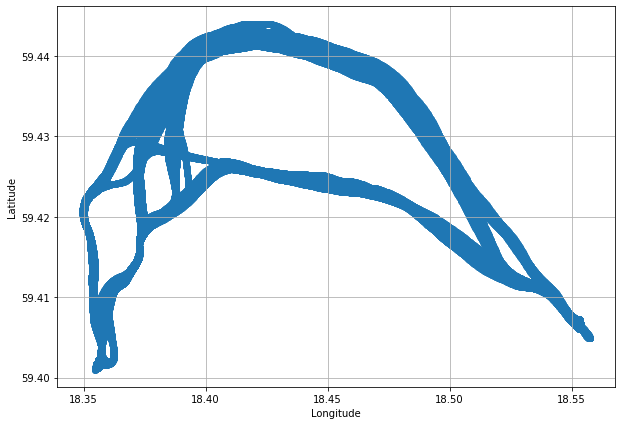

In [12]:
# Create a scatter plot of latitude and longitude to visualize the ferry's path
fig = plt.figure(figsize=(10,7))
plt.scatter(dforig['longitude'], dforig['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.savefig(Output_folder+'/Scatter_dforig_lat_lon_paths.png', dpi=500)  

plt.show()

In [13]:
# st=stop

In [14]:
df.direction.unique()
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

243688


direction
South                 104308
North_Middle_Upper     66628
North_West_Upper       26867
North_East_Lower       26311
North_Middle_Lower     11407
South_West              4408
North_West_Lower        3759
Name: count, dtype: int64

### Merging and changing names of some paths (minority paths with slight difference)

In [15]:
df['direction'] = df['direction'].replace('North_West_Upper', 'North_West')
df['direction'] = df['direction'].replace('North_West_Lower', 'North_West')

df['direction'] = df['direction'].replace('North_East_Lower', 'North_East')
df['direction'] = df['direction'].replace('North_Middle_Upper', 'North_Middle')
df['direction'] = df['direction'].replace('North_Middle_Lower', 'North_Middle')

# Check the new unique values
df.direction.unique()
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

243688


direction
South           104308
North_Middle     78035
North_West       30626
North_East       26311
South_West        4408
Name: count, dtype: int64

In [16]:
dforig1=df
dforig2=df
dforig3=df

In [17]:
# df = df[['latitude', 'longitude', 'speedOverGround', 'courseOverGroundTrue',
#               'distanceFromDock', 'distanceToNextDock', 'distanceToPreviousDock', 
#               'accumDistLeg', 'accumFuelLeg', 'accumTimeLeg', 'EngineFuelRate',
#               'windSpeedOverGround', 'windDirectionTrue',  'windSpeed','windDirection', 
#               'waveheight', 'wavedirect','currentSpeed', 'currentDirection',
#               'windSpeed_sg', 'windDirection_sg', 'Temp_2m', 'Temp_surf',
#        'Snow_depth', 'Snow_fall', 'Press_surf', 'Precip',
#          'iceCover', 'swellHeight', 'secondarySwellHeight','waterTemperature',
#          'direction']]


df['pathSelection']=df.direction

In [18]:
df.shape

(243688, 73)

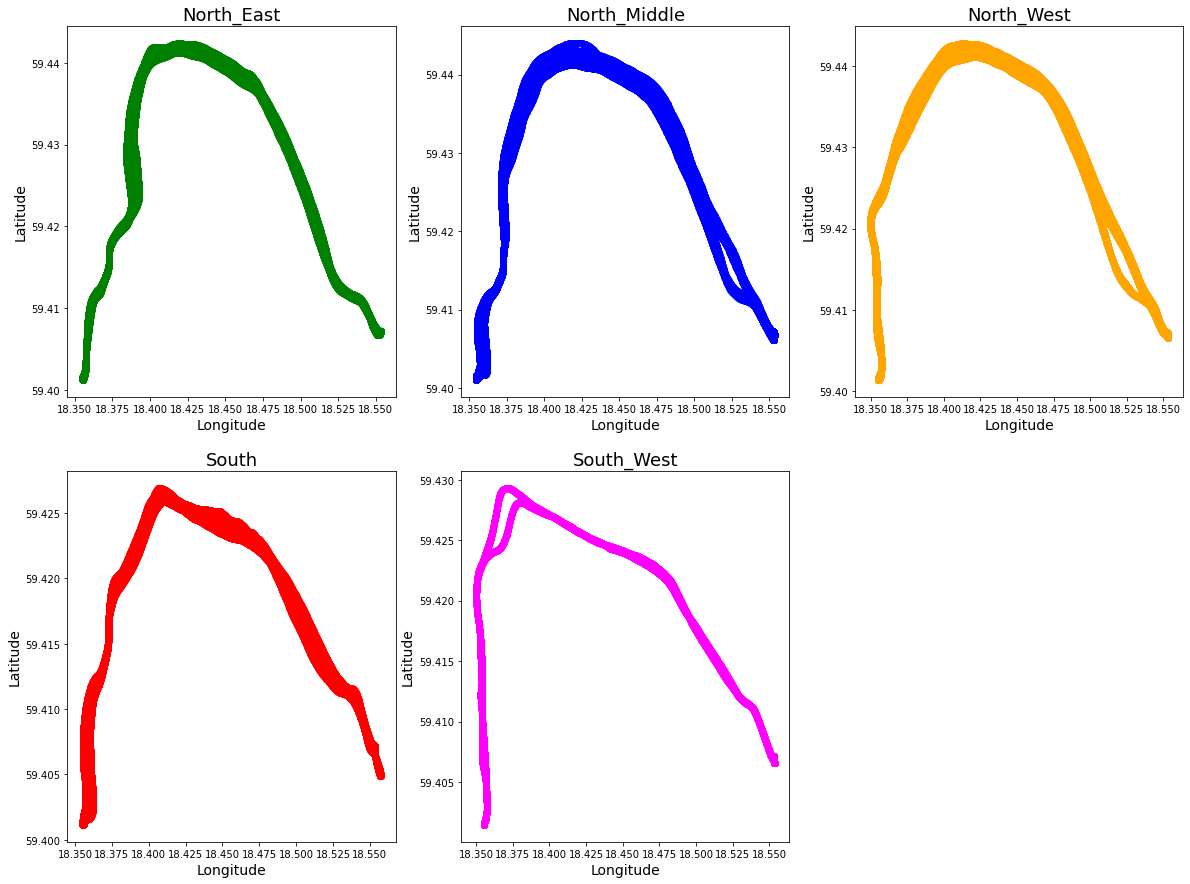

In [19]:
import matplotlib.pyplot as plt

# Filter data for each direction
north_east_data = df[df['direction'] == 'North_East']
north_middle_data = df[df['direction'] == 'North_Middle']
north_west_data = df[df['direction'] == 'North_West']
south_data = df[df['direction'] == 'South']
south_west_data = df[df['direction'] == 'South_West']

# Create subplots
fig_scatter_actual_paths, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Scatter plots for each direction
axes[0, 0].scatter(north_east_data['longitude'], north_east_data['latitude'], color='green')
axes[0, 1].scatter(north_middle_data['longitude'], north_middle_data['latitude'], color='blue')
axes[0, 2].scatter(north_west_data['longitude'], north_west_data['latitude'], color='orange')
axes[1, 0].scatter(south_data['longitude'], south_data['latitude'], color='red')
axes[1, 1].scatter(south_west_data['longitude'], south_west_data['latitude'], color='magenta')


# Titles for each subplot
axes[0, 0].set_title('North_East',fontsize=18)
axes[0, 1].set_title('North_Middle',fontsize=18)
axes[0, 2].set_title('North_West',fontsize=18)
axes[1, 0].set_title('South',fontsize=18)
axes[1, 1].set_title('South_West',fontsize=18)

# Add axis labels
for ax in axes.flatten():
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    
# Hide the empty subplot
axes[1, 2].axis('off')


# Save the figure
fig_scatter_actual_paths.savefig(Output_folder+'/Fig_Cind_route_Indv_5paths'+'.png', dpi=300)


In [20]:
# dforig[(dforig.RT_id==1308) & (dforig.Direct_RT==0)].longitude
df.direction.unique()

array(['North_East', 'North_Middle', 'South', 'North_West', 'South_West'],
      dtype=object)

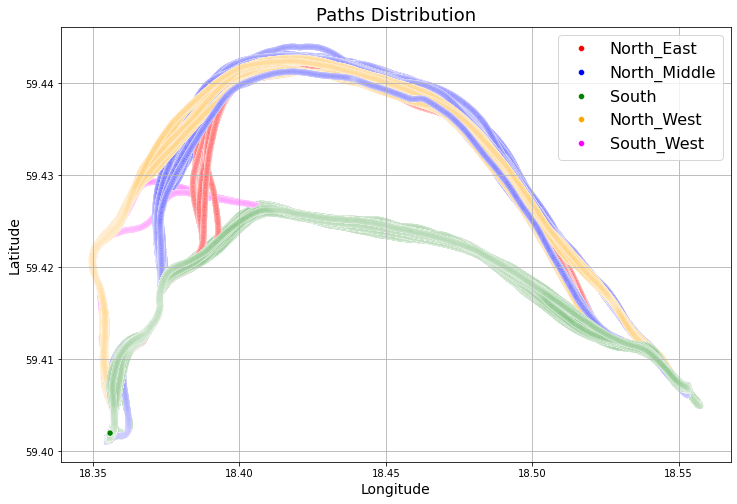

In [21]:
import seaborn as sns

# Visualize the distribution of latitude and longitude for all path classes in a single plot
fig = plt.figure(figsize=(12, 8))

# Use the 'hue' parameter to specify the path selection class
sns.scatterplot(x='longitude', y='latitude', hue='direction', 
                data=df, legend='full', palette=['red', 'blue', 'green', 'orange','magenta'])


# Set title
plt.title('Paths Distribution', fontsize=18)

plt.legend(fontsize=16)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.grid()

plt.savefig(Output_folder+'/ScatterPlot_Colorful_paths.png')  

plt.show()

In [22]:
df.direction.unique()

array(['North_East', 'North_Middle', 'South', 'North_West', 'South_West'],
      dtype=object)

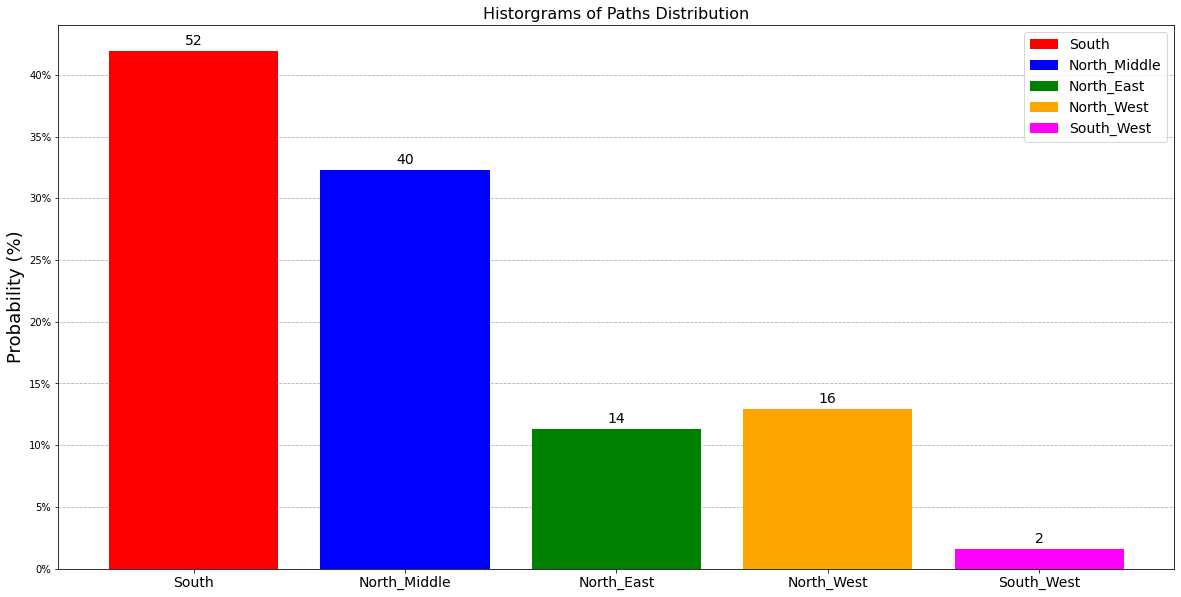

In [23]:
# train_df.groupby(['RT_id']).mean()
rt_class=[]
rt_class=df.groupby('RT_id')['direction'].first()

# Calculate the probability distribution of each path class
prob_dist = rt_class.value_counts(normalize=True)
counts = rt_class.value_counts()

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Path Class', fontsize=14)
ax.set_ylabel('Probability (%)', fontsize=14)


# Set the colors and labels for each path class
colors=['red', 'blue', 'green', 'orange', 'magenta']

labels = ['South', 'North_Middle', 'North_East', 'North_West', 'South_West']

# Plot the probability distribution for each path class
for i in range(len(labels)):
    ax.bar(labels[i], prob_dist[labels[i]], color=colors[i], label=labels[i], zorder=3)
    ax.text(labels[i], prob_dist[labels[i]]+0.005, str(counts[labels[i]]), ha='center', fontsize=14)

# Set the y-axis labels as percentages
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.tick_params(axis='x', labelsize=14)


# Set the title and legend
ax.set_title('Historgrams of Paths Distribution', fontsize=16)
plt.legend(fontsize=16)
plt.xlabel('',fontsize=18)
plt.ylabel('Probability (%)',fontsize=18)

ax.legend(fontsize=14)
ax.grid(axis='y', linestyle='--', zorder=0)


plt.savefig(Output_folder+'/Hist_5paths.png', dpi=500)  

plt.show()


### Distance to the nearest point 
To get a distance matrix for between the routes

In [24]:
# dforig.columns
dforig=dforig1
dforig.direction.unique()
print(dforig.direction.value_counts())
print(dforig.shape)

direction
South           104308
North_Middle     78035
North_West       30626
North_East       26311
South_West        4408
Name: count, dtype: int64
(243688, 73)


In [25]:
dforig[dforig.direction=='South'].RT_id.unique()
dforig[dforig.direction=='North_Middle'].RT_id.unique()
dforig[dforig.direction=='North_East'].RT_id.unique()
dforig[dforig.direction=='North_West'].RT_id.unique()
dforig[dforig.direction=='South_West'].RT_id.unique()


array([22., 75.])

#### Example of train_df small to fast the calculation of distance matrix

In [26]:
# rts_list=[7, 1, 0, 22, 27, 10, 103, 3, 9, 2, 75, 5, 33, 13, 12, 6, 24, 39,19, 84, 105]; rts_list_fg=0


rts_list=list(dforig2.RT_id.unique()); rts_list_fg=2


# train_df=train_df[train_df.RT_id.isin(rts_list)]
train_df=dforig2[dforig2.RT_id.isin(rts_list)]

# train_df.RT_id.unique()

In [27]:
train_df.shape

(243688, 73)

In [28]:
# train_df.groupby(['RT_id']).mean()
df_class_disp=[]
df_class_disp=train_df.groupby('RT_id')['direction'].first()
df_class_disp = df_class_disp.reindex(rts_list)
df_class_disp

RT_id
0.0        North_East
1.0      North_Middle
2.0        North_East
3.0      North_Middle
4.0        North_East
             ...     
119.0           South
120.0           South
121.0           South
122.0           South
123.0           South
Name: direction, Length: 124, dtype: object

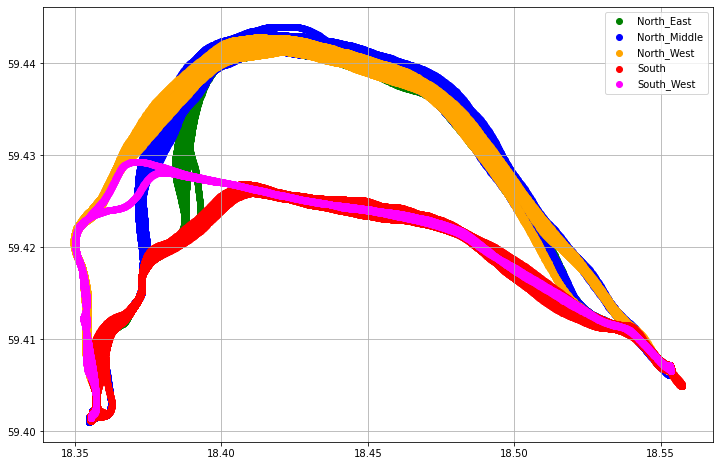

In [29]:
# filter dataframe to include only rows with RT_id values in rts_list
path_plt = train_df[train_df.RT_id.isin(rts_list)]
# path_plt = train_df[train_df.RT_id.isin([3, 9, 1692, 1697, 1700])]

# plot the data
colors={'South':'red', 'North_Middle':'blue', 'North_East':'green', 
        'North_West':'orange','South_West':'magenta'}


# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(12, 8))

for direction, group in path_plt.groupby('direction'):
    ax.scatter(group['longitude'], group['latitude'], c=colors[direction], label=direction)
    ax.grid()
ax.legend()


plt.savefig(Output_folder+'/scatterplot_5paths_case_'+str(rts_list_fg)+'.png', dpi=500)  

plt.show()

In [30]:
###To find the 'RT_id's that have more than one unique value for the 'direction' column
counts = train_df.groupby('RT_id')['direction'].nunique()
multiple_classes = counts[counts > 1].index.tolist()
print(multiple_classes) ###So there is no path that has more than 1 class

counts = dforig3.groupby('RT_id')['direction'].nunique()
multiple_classes = counts[counts > 1].index.tolist()
print(multiple_classes) ###For the entire data, there is no path that has more than 1 class

[]
[]


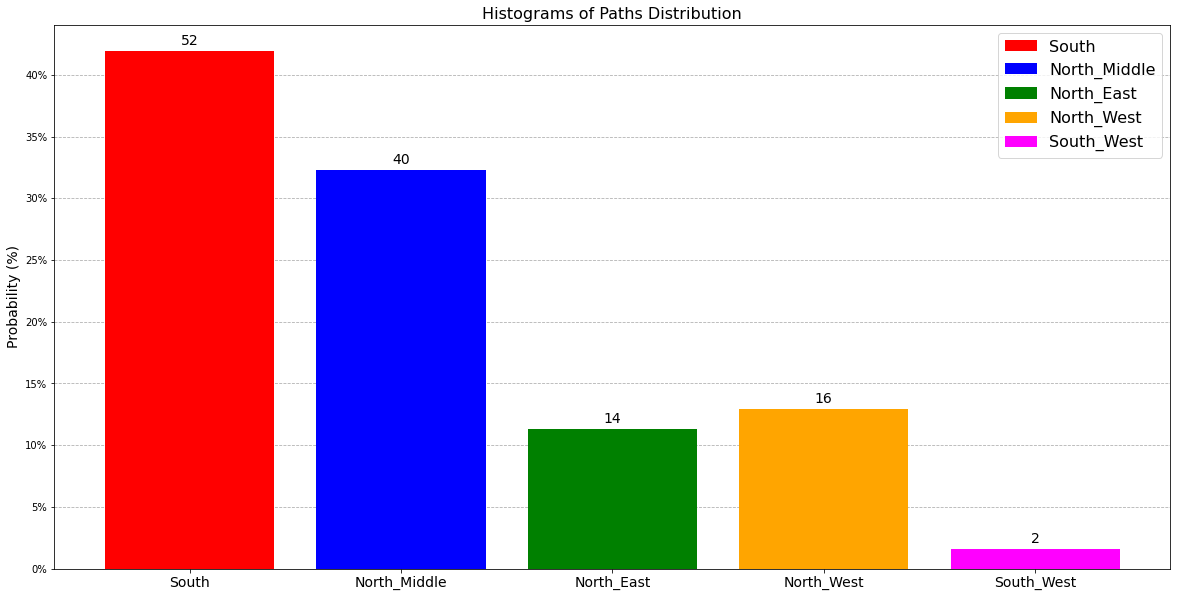

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# train_df.groupby(['RT_id']).mean()
rt_class=[]
# rt_class=train_df.groupby('RT_id')['direction'].first()
rt_class = train_df.groupby('RT_id')['direction'].apply(lambda x: x.mode()[0])
# rt_class = rt_class.reindex(rts_list)
# Calculate the probability distribution of each path class
prob_dist = rt_class.value_counts(normalize=True)
counts = rt_class.value_counts()

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Path Class', fontsize=14)
ax.set_ylabel('Probability (%)', fontsize=14)


# Set the colors and labels for each path class
colors=['red', 'blue', 'green', 'orange', 'magenta']

labels = ['South', 'North_Middle', 'North_East', 'North_West', 'South_West']

# Plot the probability distribution for each path class
for i in range(len(labels)):
    ax.bar(labels[i], prob_dist[labels[i]], color=colors[i], label=labels[i], zorder=3)
    ax.text(labels[i], prob_dist[labels[i]]+0.005, str(counts[labels[i]]), ha='center', fontsize=14)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.tick_params(axis='x', labelsize=14)

# Set the title and legend
ax.set_title('Histograms of Paths Distribution', fontsize=16)
plt.legend(fontsize=16)
plt.xlabel('',fontsize=18)
ax.grid(axis='y', linestyle='--', zorder=0)

plt.savefig(Output_folder+'/Barplot_hists_5paths.png', dpi=500)  

plt.show()


In [32]:
train_df.shape

(243688, 73)

In [33]:
train_df[train_df.direction=='East_Canal']
train_df.groupby('RT_id')['direction'].apply(lambda x: x.mode()[0])

RT_id
0.0        North_East
1.0      North_Middle
2.0        North_East
3.0      North_Middle
4.0        North_East
             ...     
119.0           South
120.0           South
121.0           South
122.0           South
123.0           South
Name: direction, Length: 124, dtype: object

In [34]:
paths = []

rts_ex=rts_list
for pth in rts_ex:
    df_latlon=train_df[train_df.RT_id.isin([pth])]
    path = list(zip(df_latlon['latitude'], df_latlon['longitude']))
    paths.append(path)

len(paths)

124

#### Computing the distance matrix 

In [35]:
from scipy.spatial import KDTree
import numpy as np
import time

# Record the start time
start_time = time.time()

# define a list of paths, each represented as a list of latitude and longitude coordinates
paths=paths

# convert the paths to numpy arrays
path_arrays = [np.array(path) for path in paths]

# compute the distance matrix between paths using KDTree
distances = np.zeros((len(paths), len(paths)))
for i, path1 in enumerate(paths):
    for j, path2 in enumerate(paths):
        if i != j:
            tree = KDTree(np.array(path2))
            dist, idx = tree.query(np.array(path1), k=1)
            distances[i,j] = dist.sum()


# print the distance matrix
print(distances.shape)

end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the distance matrix and computation time
print("Distance Matrix Shape:", distances.shape)
print("Computation Time:", elapsed_time, "seconds")

(124, 124)
Distance Matrix Shape: (124, 124)
Computation Time: 53.594937801361084 seconds


In [36]:
## Convert the distances_train array to a DataFrame
df_distance= pd.DataFrame(distances, index=df_class_disp, columns=df_class_disp)

# Rename the index and column names
df_distance.index.name = ''
df_distance.columns.name = ''

# Print the DataFrame
df_distance.round(4)


,North_East,North_Middle,North_East,North_Middle,North_East,North_Middle,North_Middle,South,North_Middle,South,...,South,South,South,South,South,South,South,South,South,South
,,,,,,,,,,,,,,,,,,,,,
North_East,0.0000,3.4235,1.2391,2.7371,0.7507,3.3733,3.7269,11.7282,3.0620,11.5081,...,11.7987,11.7374,11.8917,11.8027,11.8036,11.6523,11.5540,11.8052,11.6195,11.6193
North_Middle,3.3103,0.0000,4.1225,1.0304,3.6923,0.9850,0.7858,13.1285,0.8256,13.0228,...,12.8597,13.2732,12.7283,13.3524,12.8227,13.2100,13.0201,12.5565,12.9808,12.4667
North_East,1.0908,3.9560,0.0000,3.3101,0.5928,3.9098,4.2548,9.8341,3.6218,9.6078,...,9.8709,9.8211,9.9162,9.8846,9.8605,9.7799,9.6995,9.8100,9.6656,9.6080
North_Middle,2.5716,1.0285,3.4072,0.0000,2.9364,0.9662,1.0797,12.9743,0.7019,12.8371,...,12.8647,13.1128,12.8459,13.1983,12.7122,13.0322,12.8654,12.6361,12.8204,12.4581
North_East,0.6372,3.5177,0.5892,2.8683,0.0000,3.4883,3.8184,9.7614,3.1983,9.5954,...,9.8302,9.8111,9.8952,9.8837,9.8165,9.7465,9.6675,9.8025,9.6093,9.6290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South,13.1039,16.1948,12.2816,15.6115,12.7158,15.8118,16.2195,0.4183,15.7479,0.3868,...,0.6366,0.4751,0.7211,0.5653,0.6523,0.0000,0.4311,0.7084,0.3847,0.7977
South,13.8283,17.1119,12.9560,16.5143,13.4009,16.7413,17.1524,0.5226,16.6633,0.5482,...,0.5717,0.5739,0.7080,0.7006,0.5480,0.4537,0.0000,0.7271,0.4904,0.6733
South,13.5060,16.2230,12.5268,15.7864,12.9788,15.8143,16.2671,0.6979,15.7597,0.7482,...,0.4721,0.8045,0.2952,0.8913,0.5201,0.8420,0.8342,0.0000,0.6592,0.3905


In [37]:
rts_list_fg

2

### K-Mean with distance matrix

In [38]:
from sklearn.cluster import KMeans

# Create a dictionary to map cluster labels to path class labels


if rts_list_fg==0:
    cluster_label_map = {
        0: 'North_West',
        1: 'South',
        2: 'North_East',
        3: 'North_Middle',
        4: 'South_West'}


if rts_list_fg==2:
    cluster_label_map = {
        0: 'North_West',
        1: 'South',
        2: 'North_East',
        3: 'North_Middle',
        4: 'South_West'}


# Cluster the path classes in train_df based on their distances
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(distances)

clusters_train= kmeans.predict(distances)
clusters_train

# Apply the mapping to the cluster labels
path_class_labels = [cluster_label_map[label] for label in clusters_train]


# path_class_labels


In [39]:
y_pred=np.array(path_class_labels)
y_test=df_class_disp.values
print({class_name: count for class_name, count in zip(*np.unique(y_test, return_counts=True))})
print({class_name: count for class_name, count in zip(*np.unique(y_pred, return_counts=True))})

{'North_East': 14, 'North_Middle': 40, 'North_West': 16, 'South': 52, 'South_West': 2}
{'North_East': 16, 'North_Middle': 20, 'North_West': 2, 'South': 34, 'South_West': 52}


In [40]:
from sklearn.metrics import confusion_matrix
conf_mat_kmean = confusion_matrix(y_test, y_pred)
# print(f'Confusion matrix:\n{conf_mat}')

df_conf_mat = pd.DataFrame(conf_mat_kmean, index=['North_East', 'North_Middle', 'North_West',
                                            'South', 'South_West'], ##Actual paths
                           columns=['North_East', 'North_Middle', 'North_West',
                                            'South', 'South_West']) ##Predicted paths
df_conf_mat


##### Note: Rows=Actual paths, Columns=Predicted paths

,North_East,North_Middle,North_West,South,South_West
North_East,0,14,0,0,0
North_Middle,0,6,0,34,0
North_West,16,0,0,0,0
South,0,0,0,0,52
South_West,0,0,2,0,0


In [41]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  North_East       0.00      0.00      0.00        14
North_Middle       0.30      0.15      0.20        40
  North_West       0.00      0.00      0.00        16
       South       0.00      0.00      0.00        52
  South_West       0.00      0.00      0.00         2

    accuracy                           0.05       124
   macro avg       0.06      0.03      0.04       124
weighted avg       0.10      0.05      0.06       124



In [42]:
report = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame.from_dict(report).transpose().round(3)
df_report

,precision,recall,f1-score,support
North_East,0.000,0.000,0.000,14.000
North_Middle,0.300,0.150,0.200,40.000
North_West,0.000,0.000,0.000,16.000
South,0.000,0.000,0.000,52.000
South_West,0.000,0.000,0.000,2.000
accuracy,0.048,0.048,0.048,0.048
macro avg,0.060,0.030,0.040,124.000
weighted avg,0.097,0.048,0.065,124.000


In [43]:
train_df.shape

(243688, 73)

In [44]:
np.unique(labels)

array(['North_East', 'North_Middle', 'North_West', 'South', 'South_West'],
      dtype='<U12')

In [45]:
y_pred
y_test
# Find the indices of mismatched entries
mismatch_indices = np.where(y_pred != y_test)[0]

# Print the indices of mismatched entries
print(mismatch_indices.shape)
print("Indices of mismatched entries:")
print(mismatch_indices)

(118,)
Indices of mismatched entries:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  28  29  30  31  32  34  35  36  37
  38  39  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 101 102 103 104 105 106 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123]


In [46]:
# distances[mismatch_indices.tolist(),mismatch_indices.tolist()]

In [47]:
misclus_rts=df_class_disp.iloc[mismatch_indices.tolist()]
misclus_rts

RT_id
0.0        North_East
1.0      North_Middle
2.0        North_East
3.0      North_Middle
4.0        North_East
             ...     
119.0           South
120.0           South
121.0           South
122.0           South
123.0           South
Name: direction, Length: 118, dtype: object

In [48]:
misclus_rts.index

Index([  0.0,   1.0,   2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,   9.0,
       ...
       114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0],
      dtype='float64', name='RT_id', length=118)

In [49]:
# st=stop

### Plot clustering results from K-means

In [50]:
dforig.shape

(243688, 73)

In [51]:
from collections import Counter
print(len(rts_list))
print(y_test.shape)
print(y_pred.shape)
print(Counter(y_test))
print(Counter(y_pred))

124
(124,)
(124,)
Counter({'South': 52, 'North_Middle': 40, 'North_West': 16, 'North_East': 14, 'South_West': 2})
Counter({'South_West': 52, 'South': 34, 'North_Middle': 20, 'North_East': 16, 'North_West': 2})


In [52]:
# dforig2[['RT_id', 'direction', 'latitude', 'longitude']]

In [53]:
# Create a new DataFrame dforig2_result with the same structure as dforig2
dforig2_result = dforig2[['RT_id', 'latitude', 'longitude']].copy()

# Assign the cluster assignments to the 'direction' column of dforig2_result
for i, rt_id in enumerate(rts_list):
    idx = dforig2['RT_id'] == rt_id
    dforig2_result.loc[idx, 'direction'] = y_pred[i]

# Convert the 'direction' column to integer type
dforig2_result['direction'] = dforig2_result['direction']

# Verify the result
dforig2_result

,RT_id,latitude,longitude,direction
date,,,,
2022-07-01 08:54:52,0.0,59.401617,18.355397,North_Middle
2022-07-01 08:54:53,0.0,59.401609,18.355403,North_Middle
2022-07-01 08:54:54,0.0,59.401597,18.355410,North_Middle
2022-07-01 08:54:55,0.0,59.401582,18.355416,North_Middle
2022-07-01 08:54:56,0.0,59.401569,18.355422,North_Middle
...,...,...,...,...
2022-11-06 15:22:27,123.0,59.401974,18.355802,South_West
2022-11-06 15:22:28,123.0,59.401974,18.355803,South_West
2022-11-06 15:22:29,123.0,59.401973,18.355803,South_West


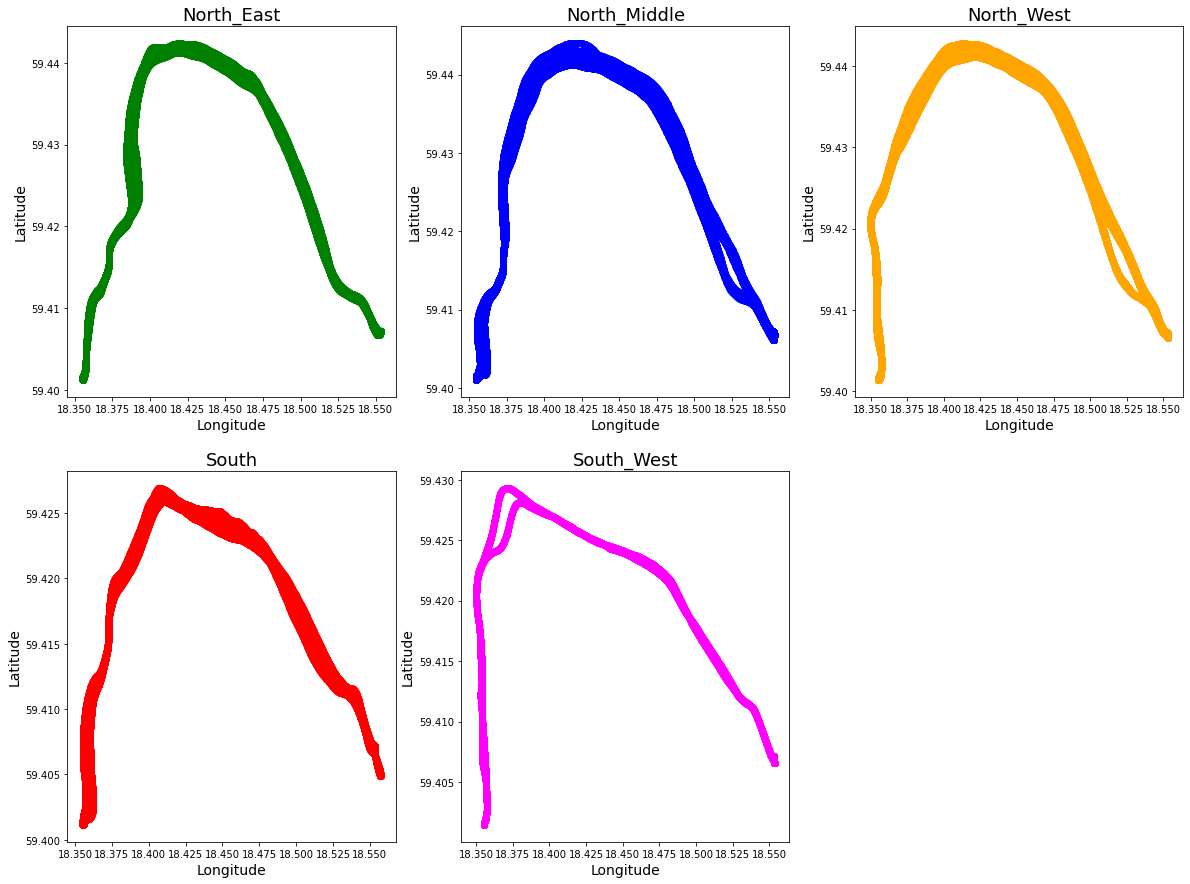

In [54]:
# Visualize the actual paths

from IPython.display import display

display(fig_scatter_actual_paths)


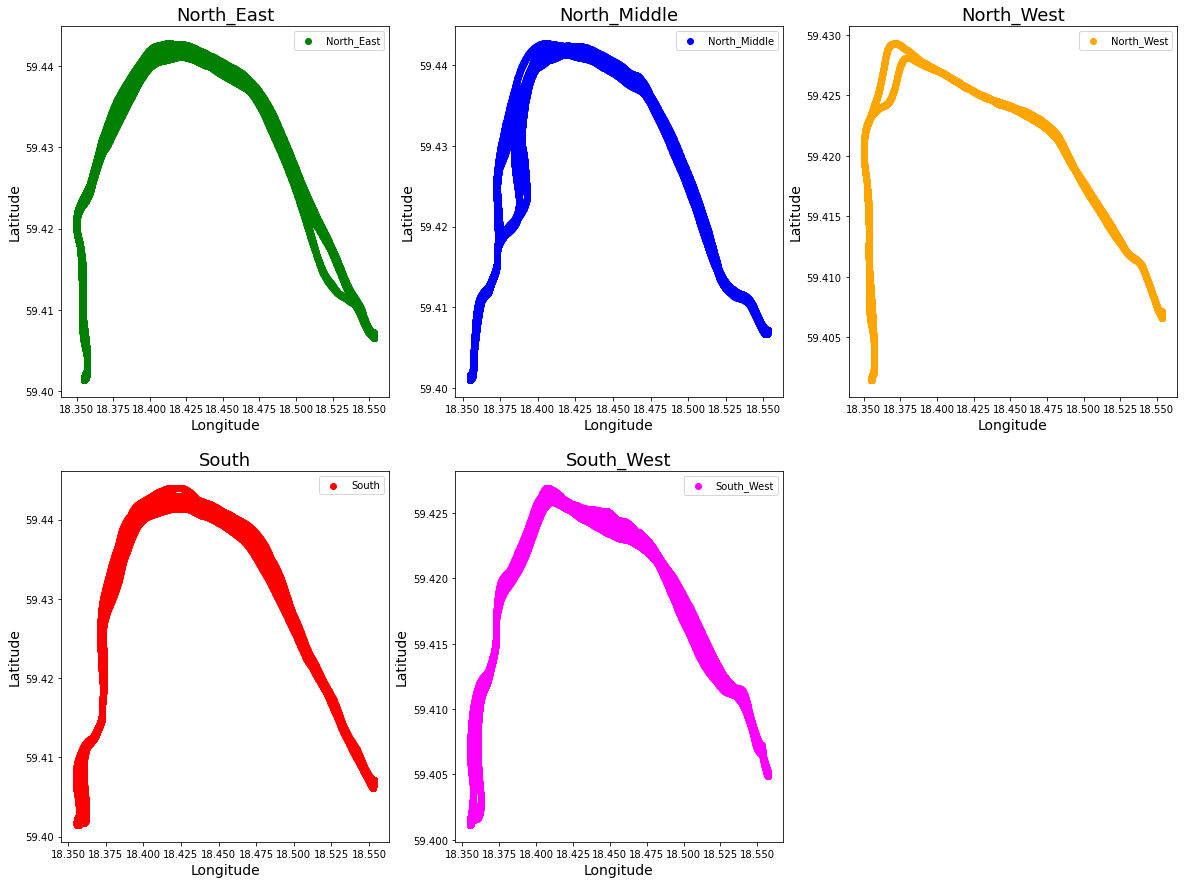

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Filter data for each direction
south_data = dforig2_result[dforig2_result['direction'] == 'South']
north_middle_data = dforig2_result[dforig2_result['direction'] == 'North_Middle']
north_east_data = dforig2_result[dforig2_result['direction'] == 'North_East']
north_west_data = dforig2_result[dforig2_result['direction'] == 'North_West']
south_west_data = dforig2_result[dforig2_result['direction'] == 'South_West']

# Scatter plots for each direction
axes[0, 0].scatter(north_east_data['longitude'], north_east_data['latitude'], c='green', label='North_East')
axes[0, 1].scatter(north_middle_data['longitude'], north_middle_data['latitude'], c='blue', label='North_Middle')
axes[0, 2].scatter(north_west_data['longitude'], north_west_data['latitude'], c='orange', label='North_West')
axes[1, 0].scatter(south_data['longitude'], south_data['latitude'], c='red', label='South')
axes[1, 1].scatter(south_west_data['longitude'], south_west_data['latitude'], c='magenta', label='South_West')

axes[0, 0].set_title('North_East', fontsize=18)
axes[0, 1].set_title('North_Middle', fontsize=18)
axes[0, 2].set_title('North_West', fontsize=18)
axes[1, 0].set_title('South', fontsize=18)
axes[1, 1].set_title('South_West', fontsize=18)

# Show legends
axes[0, 0].legend()
axes[0, 1].legend()
axes[0, 2].legend()
axes[1, 0].legend()
axes[1, 1].legend()

# Add axis labels
for ax in axes.flatten():
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    
# Hide the empty subplot
axes[1, 2].axis('off')

plt.savefig(Output_folder + '/Fig_Cind_5paths_by_Kmeans.png', dpi=300)
plt.show()


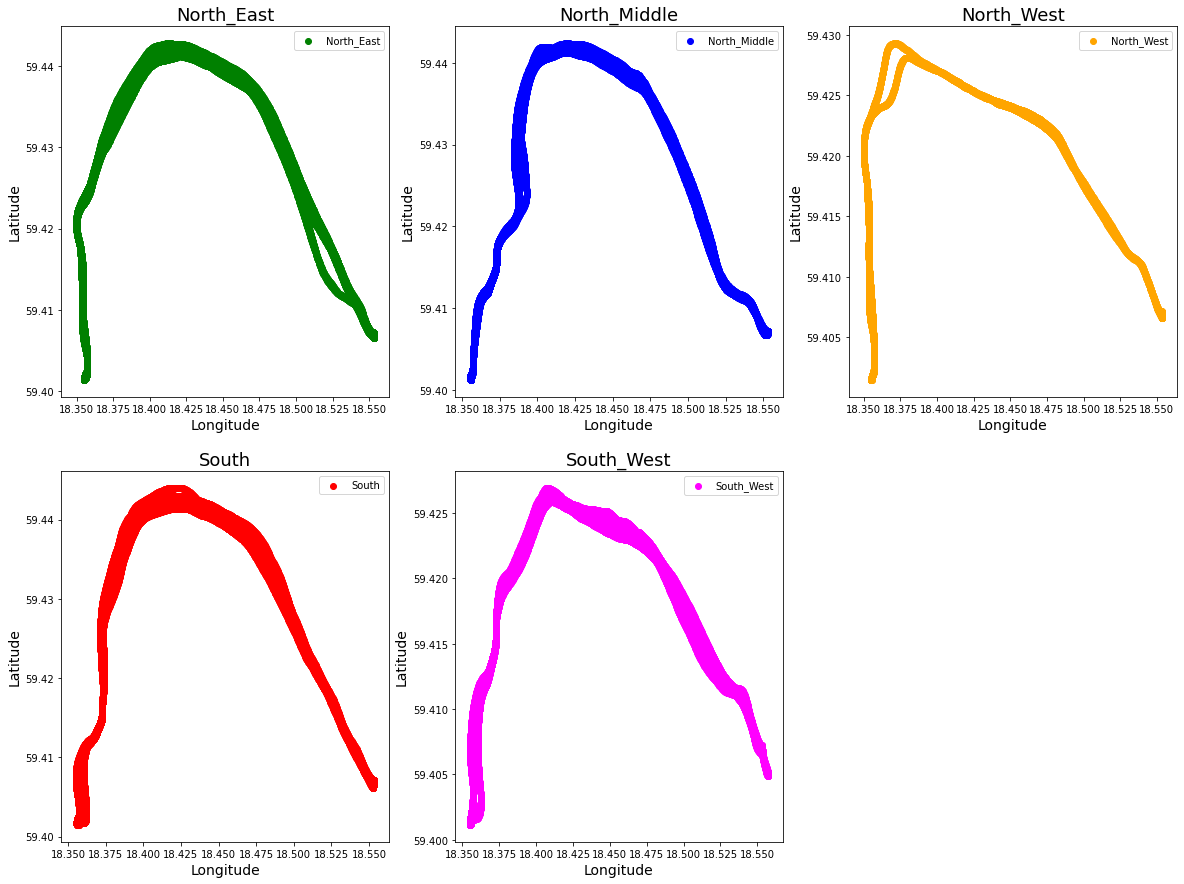

In [56]:
misclusters=dforig2_result[dforig2_result.RT_id.isin(misclus_rts.index.tolist())]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Filter data for each direction from misclusters
north_east_mis = misclusters[misclusters['direction'] == 'North_East']
north_middle_mis = misclusters[misclusters['direction'] == 'North_Middle']
north_west_mis = misclusters[misclusters['direction'] == 'North_West']
south_mis = misclusters[misclusters['direction'] == 'South']
south_west_mis = misclusters[misclusters['direction'] == 'South_West']

# Scatter plots for each direction
axes[0, 0].scatter(north_east_mis['longitude'], north_east_mis['latitude'], c='green', label='North_East')
axes[0, 1].scatter(north_middle_mis['longitude'], north_middle_mis['latitude'], c='blue', label='North_Middle')
axes[0, 2].scatter(north_west_mis['longitude'], north_west_mis['latitude'], c='orange', label='North_West')
axes[1, 0].scatter(south_mis['longitude'], south_mis['latitude'], c='red', label='South')
axes[1, 1].scatter(south_west_mis['longitude'], south_west_mis['latitude'], c='magenta', label='South_West')

axes[0, 0].set_title('North_East', fontsize=18)
axes[0, 1].set_title('North_Middle', fontsize=18)
axes[0, 2].set_title('North_West', fontsize=18)
axes[1, 0].set_title('South', fontsize=18)
axes[1, 1].set_title('South_West', fontsize=18)

# Show legends
axes[0, 0].legend()
axes[0, 1].legend()
axes[0, 2].legend()
axes[1, 0].legend()
axes[1, 1].legend()

# Add axis labels
for ax in axes.flatten():
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    
# Hide the empty subplot
axes[1, 2].axis('off')

plt.savefig(Output_folder + '/Fig_Cind_5paths_by_Kmeans_miscluster.png', dpi=300)
plt.show()


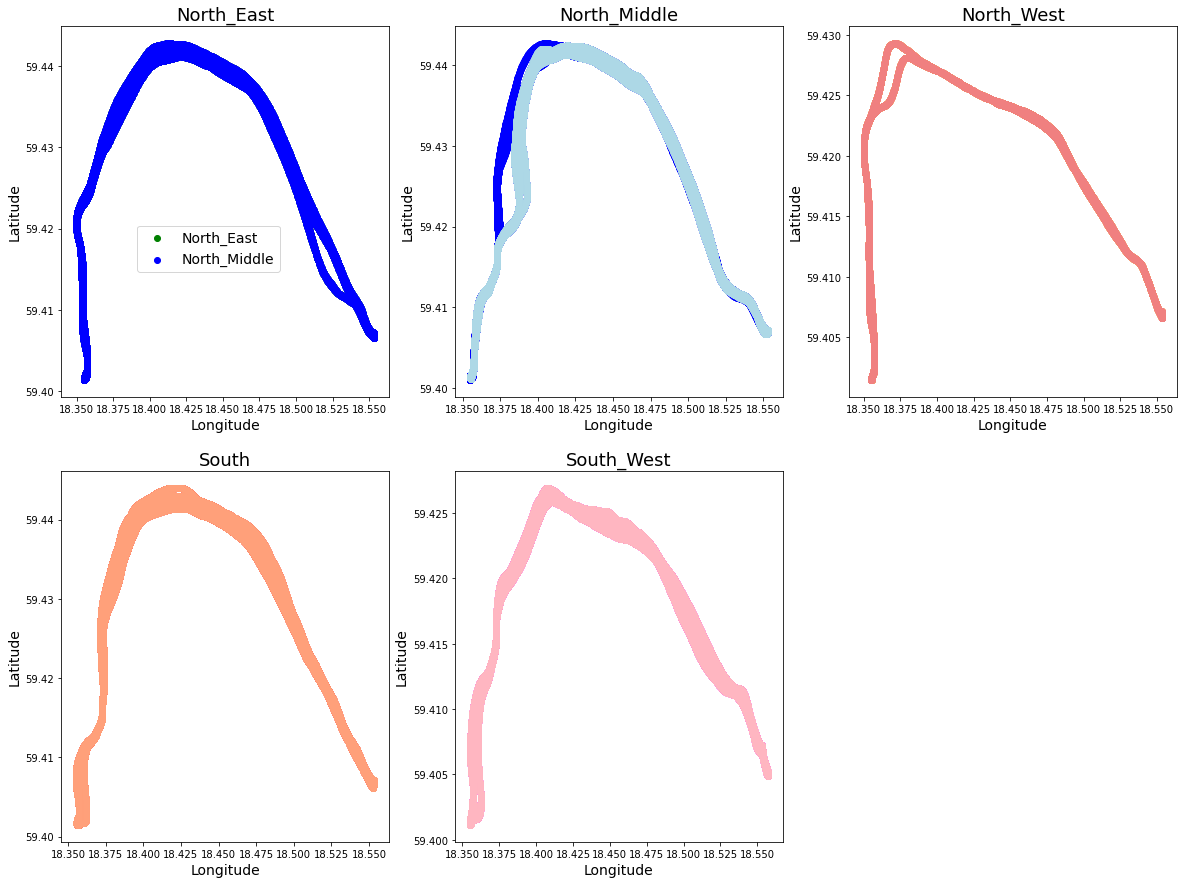

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Filter data for each direction from the original paths
# north_east_data = df[df['direction'] == 'North_East']
# north_middle_data = df[df['direction'] == 'North_Middle']
# north_west_data = df[df['direction'] == 'North_West']
# south_data = df[df['direction'] == 'South']
# south_west_data = df[df['direction'] == 'South_West']

# Filter data for each direction
south_data = dforig2_result[dforig2_result['direction'] == 'South']
north_middle_data = dforig2_result[dforig2_result['direction'] == 'North_Middle']
north_east_data = dforig2_result[dforig2_result['direction'] == 'North_East']
north_west_data = dforig2_result[dforig2_result['direction'] == 'North_West']
south_west_data = dforig2_result[dforig2_result['direction'] == 'South_West']

# Scatter plots for observed paths
# axes[0, 0].scatter(north_east_data['longitude'], north_east_data['latitude'], color='green', label='North_East (Observed)')
# axes[0, 1].scatter(north_middle_data['longitude'], north_middle_data['latitude'], color='blue', label='North_Middle (Observed)')
# axes[0, 2].scatter(north_west_data['longitude'], north_west_data['latitude'], color='orange', label='North_West (Observed)')
# axes[1, 0].scatter(south_data['longitude'], south_data['latitude'], color='red', label='South (Observed)')
# axes[1, 1].scatter(south_west_data['longitude'], south_west_data['latitude'], color='magenta', label='South_West (Observed)')

axes[0, 0].scatter(north_east_data['longitude'], north_east_data['latitude'], color='green', label='North_East')
axes[0, 1].scatter(north_middle_data['longitude'], north_middle_data['latitude'], color='blue')
axes[0, 2].scatter(north_west_data['longitude'], north_west_data['latitude'], color='orange')
axes[1, 0].scatter(south_data['longitude'], south_data['latitude'], color='red')
axes[1, 1].scatter(south_west_data['longitude'], south_west_data['latitude'], color='magenta')

# Filter data for each direction from the misclustered paths
north_east_mis = misclusters[misclusters['direction'] == 'North_East']
north_middle_mis = misclusters[misclusters['direction'] == 'North_Middle']
north_west_mis = misclusters[misclusters['direction'] == 'North_West']
south_mis = misclusters[misclusters['direction'] == 'South']
south_west_mis = misclusters[misclusters['direction'] == 'South_West']

# Scatter plots for misclustered paths
# axes[0, 0].scatter(north_east_mis['longitude'], north_east_mis['latitude'], c='lightgreen', label='North_East (Misclustered)')
# axes[0, 1].scatter(north_middle_mis['longitude'], north_middle_mis['latitude'], c='lightblue', label='North_Middle (Misclustered)')
# axes[0, 2].scatter(north_west_mis['longitude'], north_west_mis['latitude'], c='lightcoral', label='North_West (Misclustered)')
# axes[1, 0].scatter(south_mis['longitude'], south_mis['latitude'], c='lightsalmon', label='South (Misclustered)')
# axes[1, 1].scatter(south_west_mis['longitude'], south_west_mis['latitude'], c='lightpink', label='South_West (Misclustered)')

axes[0, 0].scatter(north_east_mis['longitude'], north_east_mis['latitude'], c='blue', label='North_Middle')
axes[0, 1].scatter(north_middle_mis['longitude'], north_middle_mis['latitude'], c='lightblue')
axes[0, 2].scatter(north_west_mis['longitude'], north_west_mis['latitude'], c='lightcoral')
axes[1, 0].scatter(south_mis['longitude'], south_mis['latitude'], c='lightsalmon')
axes[1, 1].scatter(south_west_mis['longitude'], south_west_mis['latitude'], c='lightpink')

axes[0, 0].set_title('North_East', fontsize=18)
axes[0, 1].set_title('North_Middle', fontsize=18)
axes[0, 2].set_title('North_West', fontsize=18)
axes[1, 0].set_title('South', fontsize=18)
axes[1, 1].set_title('South_West', fontsize=18)

# Show legends
# axes[0, 0].legend(fontsize=14)
axes[0, 0].legend(fontsize=14, loc='center', bbox_to_anchor=(0.45, 0.4))

# axes[0, 1].legend()
# axes[0, 2].legend()
# axes[1, 0].legend()
# axes[1, 1].legend()

# Add axis labels
for ax in axes.flatten():
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)

# Hide the empty subplot
axes[1, 2].axis('off')

plt.savefig(Output_folder + '/Fig_Cind_Observed_Misclustered_Paths.png', dpi=300)
plt.savefig(Output_folder + '/Fig_Cind_5paths_by_Kmeans_GMM.png', dpi=300)

plt.show()


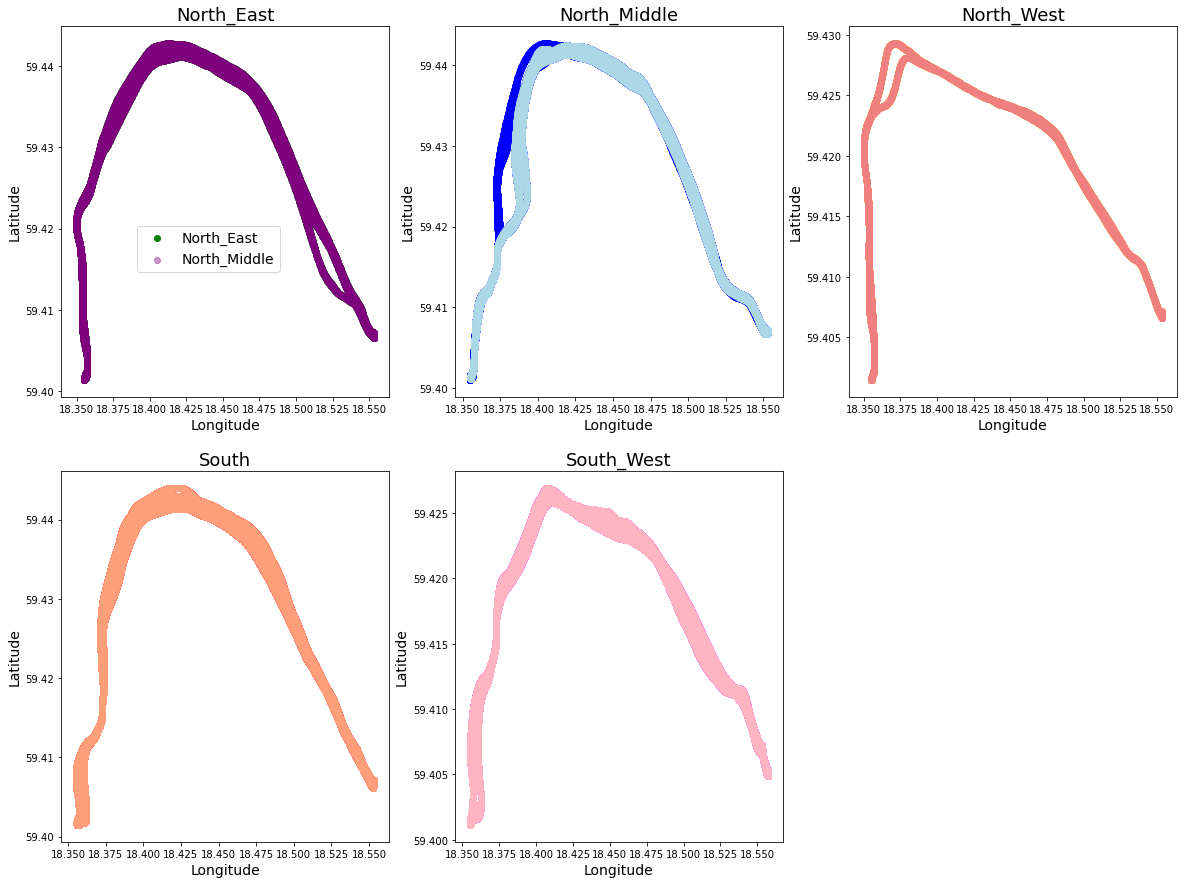

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dforig2_result', 'misclusters', 'Output_folder' are defined

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Filter data for each direction from the original paths
south_data = dforig2_result[dforig2_result['direction'] == 'South']
north_middle_data = dforig2_result[dforig2_result['direction'] == 'North_Middle']
north_east_data = dforig2_result[dforig2_result['direction'] == 'North_East']
north_west_data = dforig2_result[dforig2_result['direction'] == 'North_West']
south_west_data = dforig2_result[dforig2_result['direction'] == 'South_West']

# Scatter plots for observed paths
axes[0, 0].scatter(north_east_data['longitude'], north_east_data['latitude'], color='green', label='North_East', alpha=1)
axes[0, 1].scatter(north_middle_data['longitude'], north_middle_data['latitude'], color='blue', label='North_Middle')
axes[0, 2].scatter(north_west_data['longitude'], north_west_data['latitude'], color='orange', label='North_West')
axes[1, 0].scatter(south_data['longitude'], south_data['latitude'], color='red', label='South')
axes[1, 1].scatter(south_west_data['longitude'], south_west_data['latitude'], color='magenta', label='South_West')

# Filter data for each direction from the misclustered paths
north_east_mis = misclusters[misclusters['direction'] == 'North_East']
north_middle_mis = misclusters[misclusters['direction'] == 'North_Middle']
north_west_mis = misclusters[misclusters['direction'] == 'North_West']
south_mis = misclusters[misclusters['direction'] == 'South']
south_west_mis = misclusters[misclusters['direction'] == 'South_West']

# Scatter plots for misclustered paths
axes[0, 0].scatter(north_east_mis['longitude'], north_east_mis['latitude'], c='purple', label='North_Middle', alpha=0.4)
axes[0, 1].scatter(north_middle_mis['longitude'], north_middle_mis['latitude'], c='lightblue', alpha=0.5)
axes[0, 2].scatter(north_west_mis['longitude'], north_west_mis['latitude'], c='lightcoral', label='North_West', alpha=0.5)
axes[1, 0].scatter(south_mis['longitude'], south_mis['latitude'], c='lightsalmon', label='South', alpha=0.5)
axes[1, 1].scatter(south_west_mis['longitude'], south_west_mis['latitude'], c='lightpink', label='South_West', alpha=0.5)

axes[0, 0].set_title('North_East', fontsize=18)
axes[0, 1].set_title('North_Middle', fontsize=18)
axes[0, 2].set_title('North_West', fontsize=18)
axes[1, 0].set_title('South', fontsize=18)
axes[1, 1].set_title('South_West', fontsize=18)


# Show legends
axes[0, 0].legend(fontsize=14, loc='center', bbox_to_anchor=(0.45, 0.4))

# Add axis labels
for ax in axes.flatten():
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)

# Hide the empty subplot
axes[1, 2].axis('off')

plt.savefig(Output_folder + '/Fig2_Cind_Observed_Misclustered_Paths.png', dpi=300)
plt.savefig(Output_folder + '/Fig2_Cind_5paths_by_Kmeans_GMM.png', dpi=300)

plt.show()


In [59]:
# st=stop

####  Plot PDF for Mis-Clustered Routes form K-means

In [60]:
df_misclus=dforig2[dforig2.RT_id.isin(misclus_rts.index.tolist())]
df_corct_clus=dforig2[~dforig2.RT_id.isin(misclus_rts.index.tolist())]

print(df_misclus.shape)
print(df_misclus.direction.unique())
df_misclus[['RT_id', 'latitude', 'longitude', 'direction']]

(232281, 73)
['North_East' 'North_Middle' 'South' 'North_West' 'South_West']


,RT_id,latitude,longitude,direction
date,,,,
2022-07-01 08:54:52,0.0,59.401617,18.355397,North_East
2022-07-01 08:54:53,0.0,59.401609,18.355403,North_East
2022-07-01 08:54:54,0.0,59.401597,18.355410,North_East
2022-07-01 08:54:55,0.0,59.401582,18.355416,North_East
2022-07-01 08:54:56,0.0,59.401569,18.355422,North_East
...,...,...,...,...
2022-11-06 15:22:27,123.0,59.401974,18.355802,South
2022-11-06 15:22:28,123.0,59.401974,18.355803,South
2022-11-06 15:22:29,123.0,59.401973,18.355803,South


In [61]:
df_misclus

,engine_rpm,engine_fuel_rate,latitude,longitude,latitude_can0,longitude_can0,heading_magnetic,heading_true,course_over_ground_true,speed_over_ground,...,WaveSwell_ht,Swell_ht,Snow_depth,Snow_fall,Press_surf,Precip,Bathymetry,courseOverGroundTrue,windDirectionTrue,pathSelection
date,,,,,,,,,,,,,,,,,,,,,
2022-07-01 08:54:52,1326.416667,82.000000,59.401617,18.355397,59.401590,18.355414,167.395300,172.890000,171.795700,0.448467,...,1.387444,0.619551,0.0,-5.820766e-11,101286.906250,0.002678,30.0,171.795700,160.576217,North_East
2022-07-01 08:54:53,1340.500000,101.333333,59.401609,18.355403,59.401579,18.355416,167.395300,172.890000,171.795700,0.589003,...,1.387459,0.619582,0.0,-5.820766e-11,101286.914062,0.002678,30.0,171.795700,156.996200,North_East
2022-07-01 08:54:54,1379.500000,114.500000,59.401597,18.355410,59.401562,18.355425,167.395300,172.890000,171.795700,0.742814,...,1.387473,0.619613,0.0,-5.820766e-11,101286.914062,0.002678,30.0,171.795700,153.420925,North_East
2022-07-01 08:54:55,1423.166667,120.000000,59.401582,18.355416,59.401548,18.355434,167.395300,172.890000,171.795700,0.900456,...,1.387488,0.619644,0.0,-5.820766e-11,101286.921875,0.002677,30.0,171.795700,149.662333,North_East
2022-07-01 08:54:56,1423.083333,122.000000,59.401569,18.355422,59.401535,18.355439,167.395300,172.890000,171.795700,1.056645,...,1.387503,0.619675,0.0,-5.820766e-11,101286.921875,0.002677,30.0,171.795700,151.495800,North_East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-06 15:22:27,1079.875000,28.375000,59.401974,18.355802,59.401973,18.355803,252.354950,257.849650,127.806862,0.087500,...,2.048510,0.515422,0.0,-5.820766e-11,100333.257812,0.000399,30.0,127.806862,210.930100,South
2022-11-06 15:22:28,1081.500000,35.666667,59.401974,18.355803,59.401972,18.355803,253.009533,258.504233,173.826817,0.208333,...,2.048510,0.515455,0.0,-5.820766e-11,100333.257812,0.000399,30.0,173.826817,206.375550,South
2022-11-06 15:22:29,1081.416667,39.333333,59.401973,18.355803,59.401971,18.355803,253.374350,258.869033,169.127583,0.208333,...,2.048509,0.515487,0.0,-5.820766e-11,100333.257812,0.000399,30.0,169.127583,207.490900,South


               latitude  longitude
direction                         
North_East    59.421952  18.429992
North_Middle  59.422821  18.426074
North_West    59.423574  18.421449
South         59.416949  18.434915
South_West    59.418700  18.425664
              latitude  longitude
direction                        
North_East    0.012986   0.065567
North_Middle  0.013341   0.066296
North_West    0.012728   0.070329
South         0.007223   0.063148
South_West    0.007554   0.066970


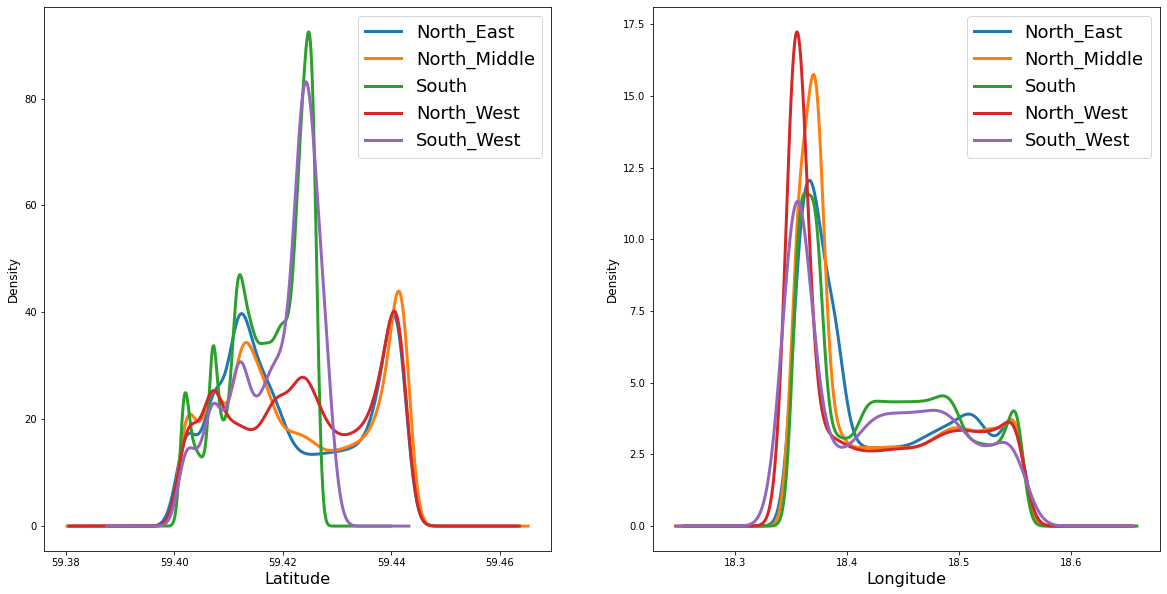

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# group the data by the 'direction' column and calculate the mean and standard deviation for the 'latitude' and 'longitude' columns
df_means = df_misclus.groupby('direction').agg({'latitude': 'mean', 'longitude': 'mean'})
df_stds = df_misclus.groupby('direction').agg({'latitude': 'std', 'longitude': 'std'})


print(df_means)
print(df_stds)

# create subplots for the means and standard deviations
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

# plot the means and standard deviations
# df_means.plot(kind='bar', ax=ax1, yerr=df_stds, capsize=3)
ax1.set_ylabel('Mean Latitude/Longitude')
# ax1.set_title('Mean and Standard Deviation of Latitude/Longitude by Direction')

# plot the probability density function (PDF) for each latitude and longitude column
for col, ax in zip(['latitude', 'longitude'], [ax1, ax2]):
    for direction in df_misclus['direction'].unique():
        data = df_misclus.loc[df_misclus['direction'] == direction, col]
        data.plot(kind='density', ax=ax, label=direction, linewidth=3)
    ax.legend(fontsize=18)
    ax.set_xlabel(col.capitalize(), fontsize=16)
    ax.set_ylabel('Density', fontsize=12)

fig.savefig(Output_folder+'/Plot_misclustering_kmean_pdfs.png', dpi=300)  
plt.show()

              latitude  longitude
direction                        
North_Middle  59.42207  18.428172
              latitude  longitude
direction                        
North_Middle  0.013002   0.066504


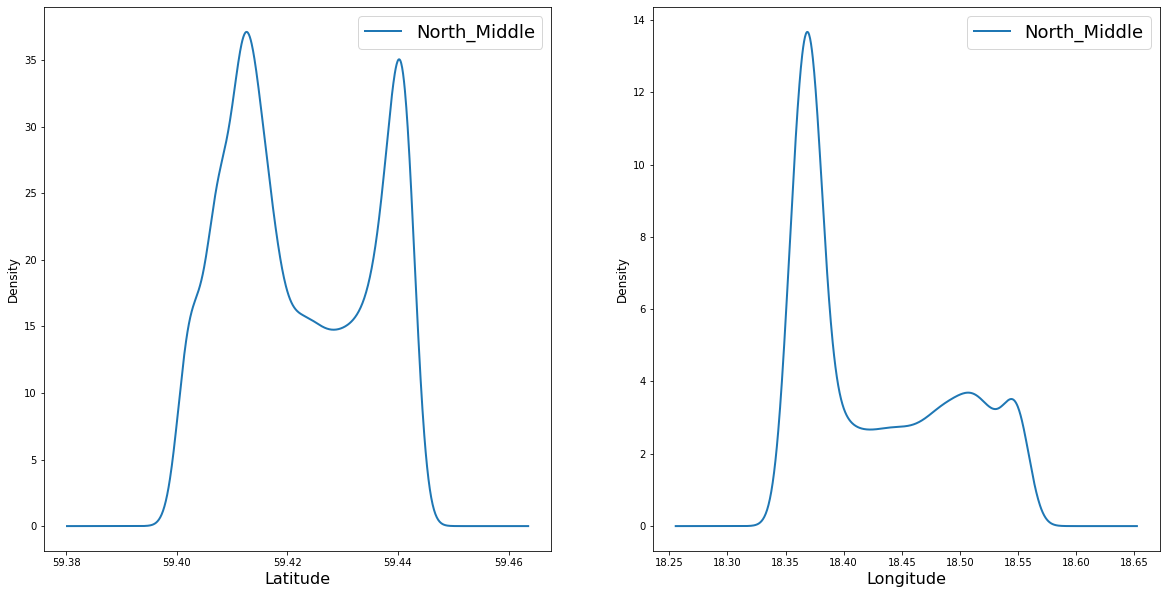

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# group the data by the 'direction' column and calculate the mean and standard deviation for the 'latitude' and 'longitude' columns
df_corrct_means = df_corct_clus.groupby('direction').agg({'latitude': 'mean', 'longitude': 'mean'})
df_corrct_std = df_corct_clus.groupby('direction').agg({'latitude': 'std', 'longitude': 'std'})

print(df_corrct_means)
print(df_corrct_std)

# create subplots for the means and standard deviations
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

# plot the means and standard deviations
# df_corrct_means.plot(kind='bar', ax=ax1, yerr=df_corrct_std, capsize=3)
# ax1.set_ylabel('Mean Latitude/Longitude')
# ax1.set_title('Mean and Standard Deviation of Latitude/Longitude by Direction')

# plot the probability density function (PDF) for each latitude and longitude column
for col, ax in zip(['latitude', 'longitude'], [ax1, ax2]):
    for direction in df_corct_clus['direction'].unique():
        data = df_corct_clus.loc[df_corct_clus['direction'] == direction, col]
        data.plot(kind='density', ax=ax, label=direction, linewidth=2)
    ax.legend(fontsize=18)
    ax.set_xlabel(col.capitalize(), fontsize=16)
    ax.set_ylabel('Density', fontsize=12)
    
fig.savefig(Output_folder+'/Fig_Cind_5paths_PDF_Correct_Paths.png', dpi=300)  
plt.show()

In [64]:
# st=stop

### GMM with distance matrix

In [65]:
from sklearn.mixture import GaussianMixture

# Create a dictionary to map cluster labels to path class labels

if rts_list_fg==0:
    cluster_label_map = {
        0: 'North_West',
        1: 'South',
        2: 'North_East',
        3: 'North_Middle',
        4: 'South_West'}


if rts_list_fg==2:
    cluster_label_map = {
        0: 'North_Middle',
        1: 'South',
        2: 'North_West',
        3: 'North_East',
        4: 'South_West'}

    
# Cluster the path classes in train_df based on their distances
# Initialize GMM with 3 clusters
gmm = GaussianMixture(n_components=5)

# Fit the model on the data
gmm.fit(distances)

gmm_labels= gmm.predict(distances)

gmm_labels

# Apply the mapping to the cluster labels
gmm_class_labels = [cluster_label_map[label] for label in gmm_labels]


# gmm_class_labels


In [66]:
y_pred_gmm=np.array(gmm_class_labels)
y_test_gmm=df_class_disp.values
print({class_name: count for class_name, count in zip(*np.unique(y_test_gmm, return_counts=True))})
print({class_name: count for class_name, count in zip(*np.unique(y_pred_gmm, return_counts=True))})

{'North_East': 14, 'North_Middle': 40, 'North_West': 16, 'South': 52, 'South_West': 2}
{'North_East': 20, 'North_Middle': 52, 'North_West': 16, 'South': 34, 'South_West': 2}


In [67]:
from sklearn.metrics import confusion_matrix
conf_mat_gmm = confusion_matrix(y_test_gmm, y_pred_gmm)
# print(f'Confusion matrix:\n{conf_mat_gmm}')


df_conf_mat_gmm = pd.DataFrame(conf_mat_gmm, index=['North_East', 'North_Middle', 'North_West',
                                            'South', 'South_West'], ##Actual paths
                           columns=['North_East', 'North_Middle', 'North_West',
                                            'South', 'South_West']) ##Predicted paths
df_conf_mat_gmm


,North_East,North_Middle,North_West,South,South_West
North_East,14,0,0,0,0
North_Middle,6,0,0,34,0
North_West,0,0,16,0,0
South,0,52,0,0,0
South_West,0,0,0,0,2


In [68]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

print(classification_report(y_test_gmm, y_pred_gmm))


              precision    recall  f1-score   support

  North_East       0.70      1.00      0.82        14
North_Middle       0.00      0.00      0.00        40
  North_West       1.00      1.00      1.00        16
       South       0.00      0.00      0.00        52
  South_West       1.00      1.00      1.00         2

    accuracy                           0.26       124
   macro avg       0.54      0.60      0.56       124
weighted avg       0.22      0.26      0.24       124



In [69]:
report = classification_report(y_test_gmm, y_pred_gmm, output_dict=True)

df_report = pd.DataFrame.from_dict(report).transpose().round(3)
df_report

,precision,recall,f1-score,support
North_East,0.700,1.000,0.824,14.000
North_Middle,0.000,0.000,0.000,40.000
North_West,1.000,1.000,1.000,16.000
South,0.000,0.000,0.000,52.000
South_West,1.000,1.000,1.000,2.000
accuracy,0.258,0.258,0.258,0.258
macro avg,0.540,0.600,0.565,124.000
weighted avg,0.224,0.258,0.238,124.000


In [70]:
np.unique(labels)

array(['North_East', 'North_Middle', 'North_West', 'South', 'South_West'],
      dtype='<U12')

In [71]:
y_pred_gmm
y_test_gmm
# Find the indices of mismatched entries
mismatch_gmm_indices = np.where(y_pred_gmm != y_test_gmm)[0]

# Print the indices of mismatched entries
print(mismatch_gmm_indices.shape)
print("Indices of mismatched entries:")
print(mismatch_gmm_indices)

(92,)
Indices of mismatched entries:
[  1   3   5   6   7   8   9  11  14  20  21  23  24  25  26  27  28  29
  30  31  32  33  34  35  36  37  38  39  40  41  43  44  45  46  47  48
  49  50  51  52  53  55  56  57  58  60  61  62  64  65  66  68  69  71
  72  73  74  77  78  79  80  81  82  83  85  87  88  89  91  93  94  95
  97  98 100 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123]


In [72]:
misclus_gmm_rts=df_class_disp.iloc[mismatch_gmm_indices.tolist()]
misclus_gmm_rts

RT_id
1.0      North_Middle
3.0      North_Middle
5.0      North_Middle
6.0      North_Middle
7.0             South
             ...     
119.0           South
120.0           South
121.0           South
122.0           South
123.0           South
Name: direction, Length: 92, dtype: object

In [73]:
misclus_gmm_rts.index

Index([  1.0,   3.0,   5.0,   6.0,   7.0,   8.0,   9.0,  11.0,  14.0,  20.0,
        21.0,  23.0,  24.0,  25.0,  26.0,  27.0,  28.0,  29.0,  30.0,  31.0,
        32.0,  33.0,  34.0,  35.0,  36.0,  37.0,  38.0,  39.0,  40.0,  41.0,
        43.0,  44.0,  45.0,  46.0,  47.0,  48.0,  49.0,  50.0,  51.0,  52.0,
        53.0,  55.0,  56.0,  57.0,  58.0,  60.0,  61.0,  62.0,  64.0,  65.0,
        66.0,  68.0,  69.0,  71.0,  72.0,  73.0,  74.0,  77.0,  78.0,  79.0,
        80.0,  81.0,  82.0,  83.0,  85.0,  87.0,  88.0,  89.0,  91.0,  93.0,
        94.0,  95.0,  97.0,  98.0, 100.0, 107.0, 108.0, 109.0, 110.0, 111.0,
       112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0,
       122.0, 123.0],
      dtype='float64', name='RT_id')

In [74]:
# st=stop

### Plot clustering results from GMM

In [75]:
dforig.shape

(243688, 73)

In [76]:
from collections import Counter
print(len(rts_list))
print(y_test_gmm.shape)
print(y_pred_gmm.shape)
print(Counter(y_test_gmm))
print(Counter(y_pred_gmm))

124
(124,)
(124,)
Counter({'South': 52, 'North_Middle': 40, 'North_West': 16, 'North_East': 14, 'South_West': 2})
Counter({'North_Middle': 52, 'South': 34, 'North_East': 20, 'North_West': 16, 'South_West': 2})


In [77]:
# dforig2[['RT_id', 'direction', 'latitude', 'longitude']]

In [78]:
# Create a new DataFrame dforig2_result with the same structure as dforig2
dforig2_result_gmm = dforig2[['RT_id', 'latitude', 'longitude']].copy()

# Assign the cluster assignments to the 'direction' column of dforig2_result
for i, rt_id in enumerate(rts_list):
    idx = dforig2['RT_id'] == rt_id
    dforig2_result_gmm.loc[idx, 'direction'] = y_pred[i]

# Convert the 'direction' column to integer type
dforig2_result_gmm['direction'] = dforig2_result_gmm['direction']

# Verify the result
dforig2_result_gmm

,RT_id,latitude,longitude,direction
date,,,,
2022-07-01 08:54:52,0.0,59.401617,18.355397,North_Middle
2022-07-01 08:54:53,0.0,59.401609,18.355403,North_Middle
2022-07-01 08:54:54,0.0,59.401597,18.355410,North_Middle
2022-07-01 08:54:55,0.0,59.401582,18.355416,North_Middle
2022-07-01 08:54:56,0.0,59.401569,18.355422,North_Middle
...,...,...,...,...
2022-11-06 15:22:27,123.0,59.401974,18.355802,South_West
2022-11-06 15:22:28,123.0,59.401974,18.355803,South_West
2022-11-06 15:22:29,123.0,59.401973,18.355803,South_West


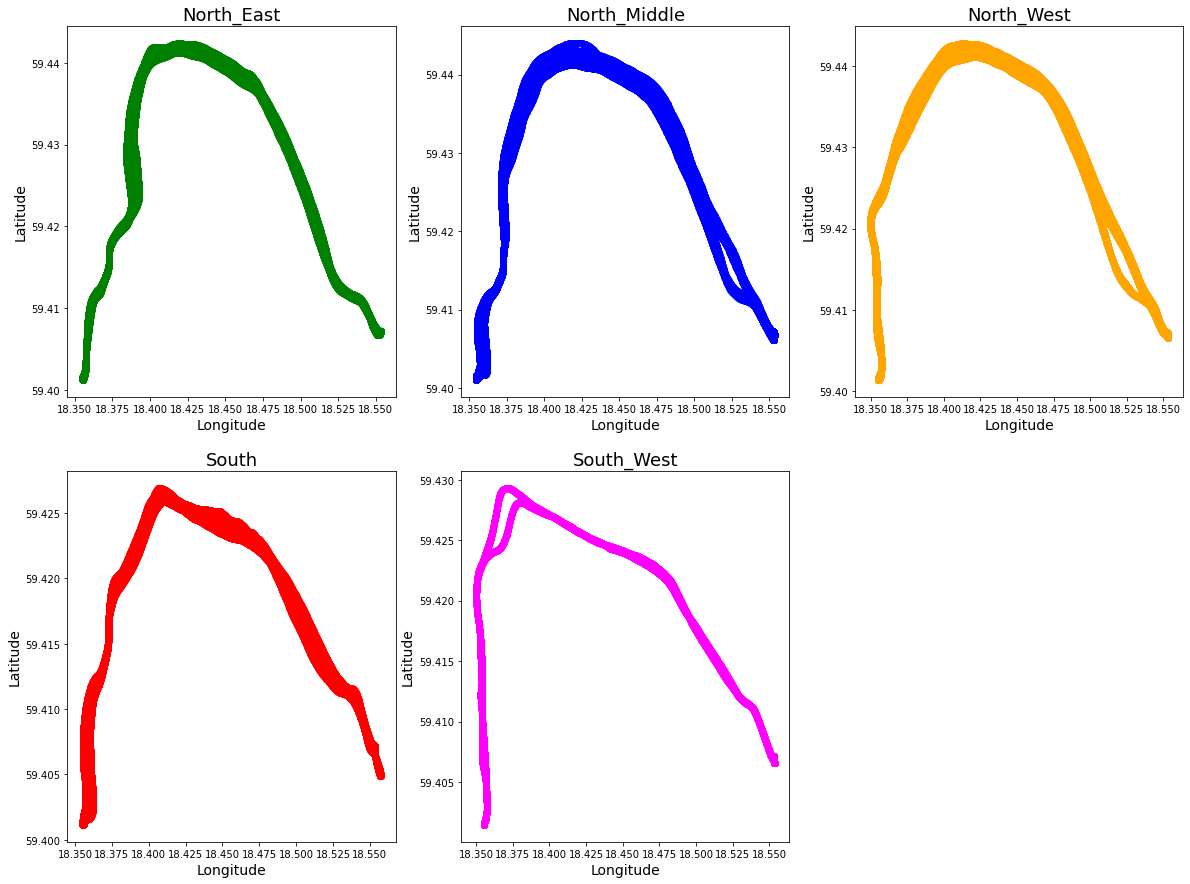

In [79]:
# Visualize the actual paths

from IPython.display import display

display(fig_scatter_actual_paths)


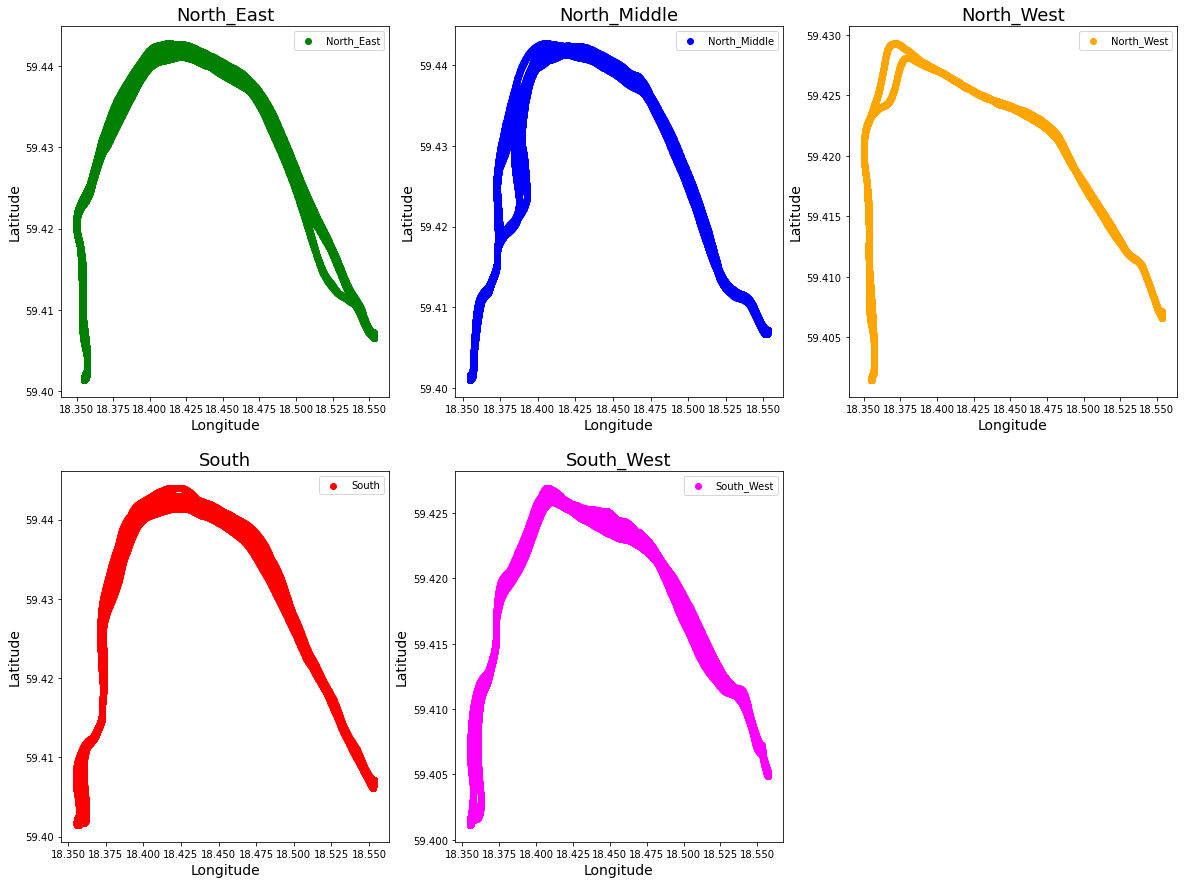

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Filter data for each direction
south_data = dforig2_result_gmm[dforig2_result_gmm['direction'] == 'South']
north_middle_data = dforig2_result_gmm[dforig2_result_gmm['direction'] == 'North_Middle']
north_east_data = dforig2_result_gmm[dforig2_result_gmm['direction'] == 'North_East']
north_west_data = dforig2_result_gmm[dforig2_result_gmm['direction'] == 'North_West']
south_west_data = dforig2_result_gmm[dforig2_result_gmm['direction'] == 'South_West']

# Scatter plots for each direction
axes[0, 0].scatter(north_east_data['longitude'], north_east_data['latitude'], c='green', label='North_East')
axes[0, 1].scatter(north_middle_data['longitude'], north_middle_data['latitude'], c='blue', label='North_Middle')
axes[0, 2].scatter(north_west_data['longitude'], north_west_data['latitude'], c='orange', label='North_West')
axes[1, 0].scatter(south_data['longitude'], south_data['latitude'], c='red', label='South')
axes[1, 1].scatter(south_west_data['longitude'], south_west_data['latitude'], c='magenta', label='South_West')

axes[0, 0].set_title('North_East', fontsize=18)
axes[0, 1].set_title('North_Middle', fontsize=18)
axes[0, 2].set_title('North_West', fontsize=18)
axes[1, 0].set_title('South', fontsize=18)
axes[1, 1].set_title('South_West', fontsize=18)

# Show legends
axes[0, 0].legend()
axes[0, 1].legend()
axes[0, 2].legend()
axes[1, 0].legend()
axes[1, 1].legend()

# Add axis labels
for ax in axes.flatten():
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    
# Hide the empty subplot
axes[1, 2].axis('off')

plt.savefig(Output_folder + '/Fig_Cind_5paths_by_GMM.png', dpi=300)
plt.show()


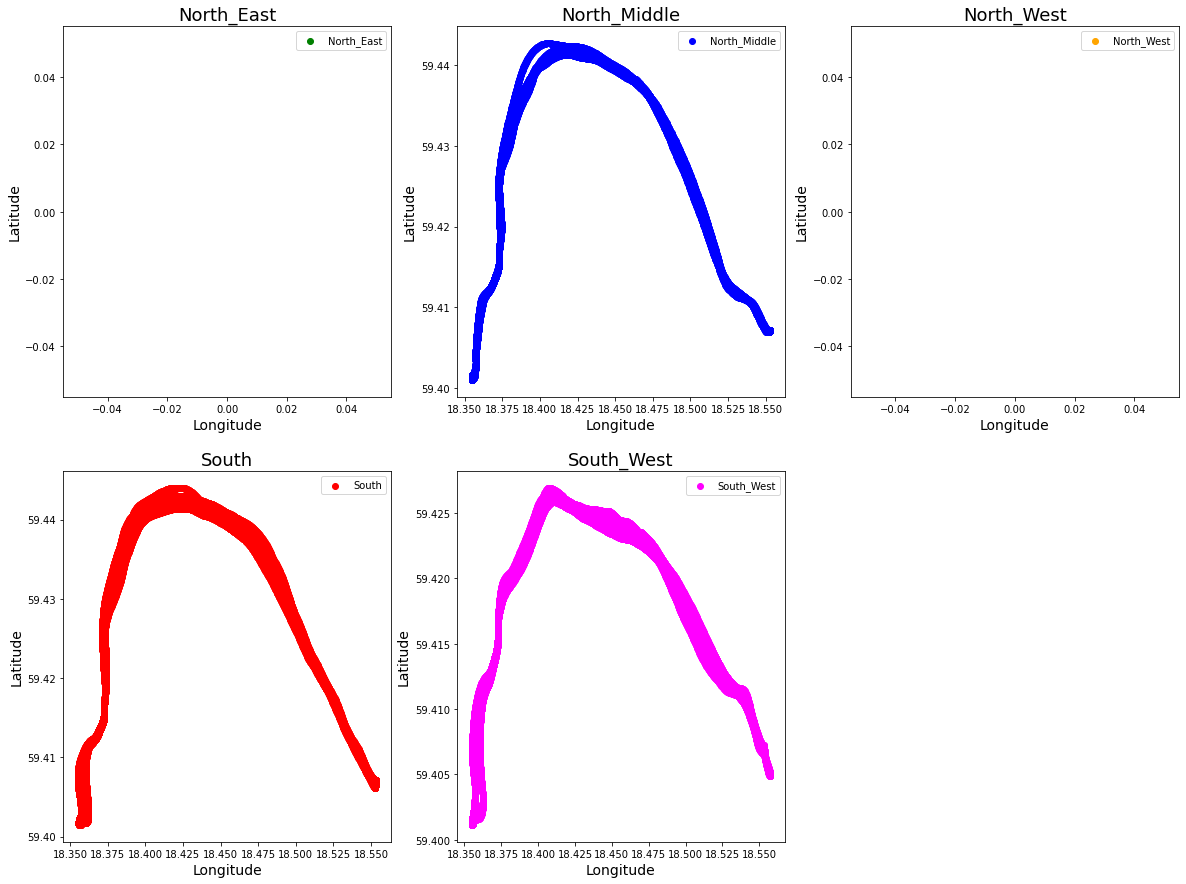

In [81]:
misclusters_gmm=dforig2_result_gmm[dforig2_result_gmm.RT_id.isin(misclus_gmm_rts.index.tolist())]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Filter data for each direction from misclusters
north_east_mis = misclusters_gmm[misclusters_gmm['direction'] == 'North_East']
north_middle_mis = misclusters_gmm[misclusters_gmm['direction'] == 'North_Middle']
north_west_mis = misclusters_gmm[misclusters_gmm['direction'] == 'North_West']
south_mis = misclusters_gmm[misclusters_gmm['direction'] == 'South']
south_west_mis = misclusters_gmm[misclusters_gmm['direction'] == 'South_West']

# Scatter plots for each direction
axes[0, 0].scatter(north_east_mis['longitude'], north_east_mis['latitude'], c='green', label='North_East')
axes[0, 1].scatter(north_middle_mis['longitude'], north_middle_mis['latitude'], c='blue', label='North_Middle')
axes[0, 2].scatter(north_west_mis['longitude'], north_west_mis['latitude'], c='orange', label='North_West')
axes[1, 0].scatter(south_mis['longitude'], south_mis['latitude'], c='red', label='South')
axes[1, 1].scatter(south_west_mis['longitude'], south_west_mis['latitude'], c='magenta', label='South_West')

axes[0, 0].set_title('North_East', fontsize=18)
axes[0, 1].set_title('North_Middle', fontsize=18)
axes[0, 2].set_title('North_West', fontsize=18)
axes[1, 0].set_title('South', fontsize=18)
axes[1, 1].set_title('South_West', fontsize=18)

# Show legends
axes[0, 0].legend()
axes[0, 1].legend()
axes[0, 2].legend()
axes[1, 0].legend()
axes[1, 1].legend()

# Add axis labels
for ax in axes.flatten():
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    
# Hide the empty subplot
axes[1, 2].axis('off')

plt.savefig(Output_folder + '/Fig_Cind_5paths_by_GMM_miscluster.png', dpi=300)
plt.show()


In [82]:
print(misclusters_gmm.shape)
print(misclusters_gmm.direction.unique())

(182343, 4)
['South' 'South_West' 'North_Middle']


####  Plot PDF for Mis-Clustered Trips from GMM

In [83]:
ec_rt_list=list(dforig2[dforig2.direction=='North_East'].RT_id.unique())

len(ec_rt_list)

14

In [84]:
df_gmm_misclus=dforig2[dforig2.RT_id.isin(misclus_gmm_rts.index.tolist())]
df_gmm_corct_clus=dforig2[~dforig2.RT_id.isin(misclus_gmm_rts.index.tolist())]
df_ec_path=dforig2[dforig2.RT_id.isin(ec_rt_list)]
df_gmm_misclus_ec_path=pd.concat([df_gmm_misclus, df_ec_path], axis=0)

print(df_gmm_misclus.shape)
print(df_gmm_misclus.direction.unique())
print(df_ec_path.direction.unique())
print(df_gmm_misclus_ec_path.direction.unique())


df_gmm_misclus[['RT_id', 'latitude', 'longitude', 'direction']]

(182343, 73)
['North_Middle' 'South']
['North_East']
['North_Middle' 'South' 'North_East']


,RT_id,latitude,longitude,direction
date,,,,
2022-07-01 12:44:57,1.0,59.407132,18.552985,North_Middle
2022-07-01 12:44:58,1.0,59.407126,18.552980,North_Middle
2022-07-01 12:44:59,1.0,59.407119,18.552975,North_Middle
2022-07-01 12:45:00,1.0,59.407111,18.552969,North_Middle
2022-07-01 12:45:01,1.0,59.407103,18.552962,North_Middle
...,...,...,...,...
2022-11-06 15:22:27,123.0,59.401974,18.355802,South
2022-11-06 15:22:28,123.0,59.401974,18.355803,South
2022-11-06 15:22:29,123.0,59.401973,18.355803,South


               latitude  longitude
direction                         
North_East    59.421952  18.429992
North_Middle  59.422711  18.426380
South         59.416949  18.434915
              latitude  longitude
direction                        
North_East    0.012986   0.065567
North_Middle  0.013294   0.066330
South         0.007223   0.063148


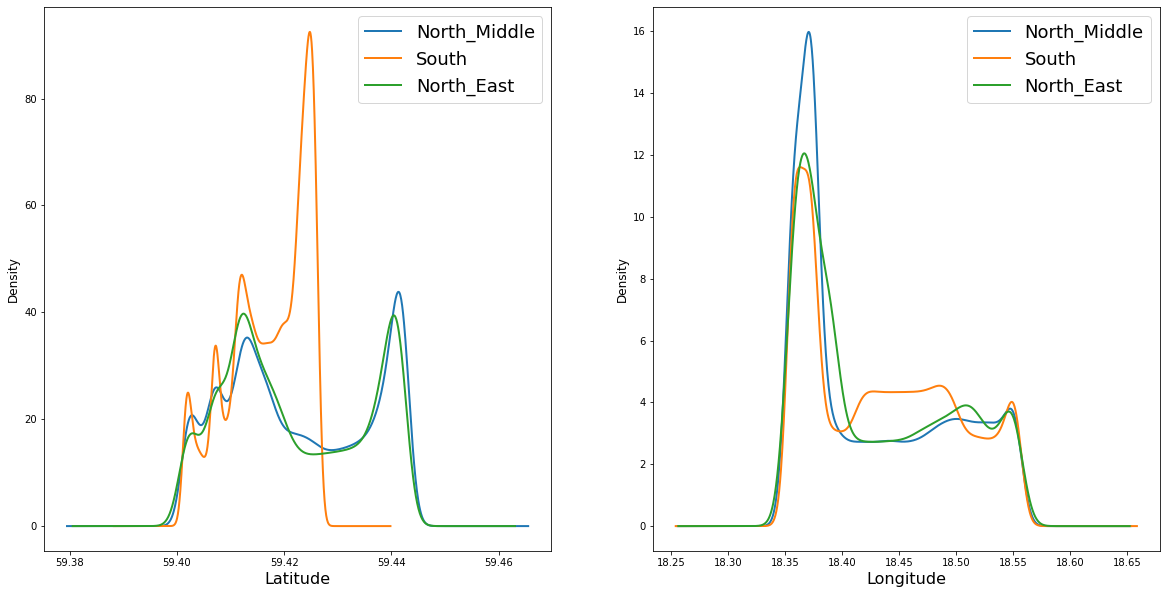

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# group the data by the 'direction' column and calculate the mean and standard deviation for the 'latitude' and 'longitude' columns
# df_gmm_means = df_gmm_misclus.groupby('direction').agg({'latitude': 'mean', 'longitude': 'mean'})
# df_gmm_stds = df_gmm_misclus.groupby('direction').agg({'latitude': 'std', 'longitude': 'std'})

df_gmm_means = df_gmm_misclus_ec_path.groupby('direction').agg({'latitude': 'mean', 'longitude': 'mean'})
df_gmm_stds = df_gmm_misclus_ec_path.groupby('direction').agg({'latitude': 'std', 'longitude': 'std'})


print(df_gmm_means)
print(df_gmm_stds)

# create subplots for the means and standard deviations
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

# plot the means and standard deviations
# df_means.plot(kind='bar', ax=ax1, yerr=df_stds, capsize=3)
ax1.set_ylabel('Mean Latitude/Longitude')

# plot the probability density function (PDF) for each latitude and longitude column
for col, ax in zip(['latitude', 'longitude'], [ax1, ax2]):
    for direction in df_gmm_misclus_ec_path['direction'].unique():
        data = df_gmm_misclus_ec_path.loc[df_gmm_misclus_ec_path['direction'] == direction, col]
        data.plot(kind='density', ax=ax, label=direction, linewidth=2)
    ax.legend(fontsize=18)
    ax.set_xlabel(col.capitalize(), fontsize=16)
    ax.set_ylabel('Density', fontsize=12)
    
# plt.suptitle('Misclustered Paths,  PDF of Latitude and Longitude')

fig.savefig(Output_folder+'/Plot_misclustering_gmm_pdfs.png', dpi=300) 
fig.savefig(Output_folder+'/Fig_Cind_5paths_PDF_Misclustered.png', dpi=300)  


plt.show()

             latitude  longitude
direction                       
North_East  59.421952  18.429992
North_West  59.423574  18.421449
South_West  59.418700  18.425664
            latitude  longitude
direction                      
North_East  0.012986   0.065567
North_West  0.012728   0.070329
South_West  0.007554   0.066970


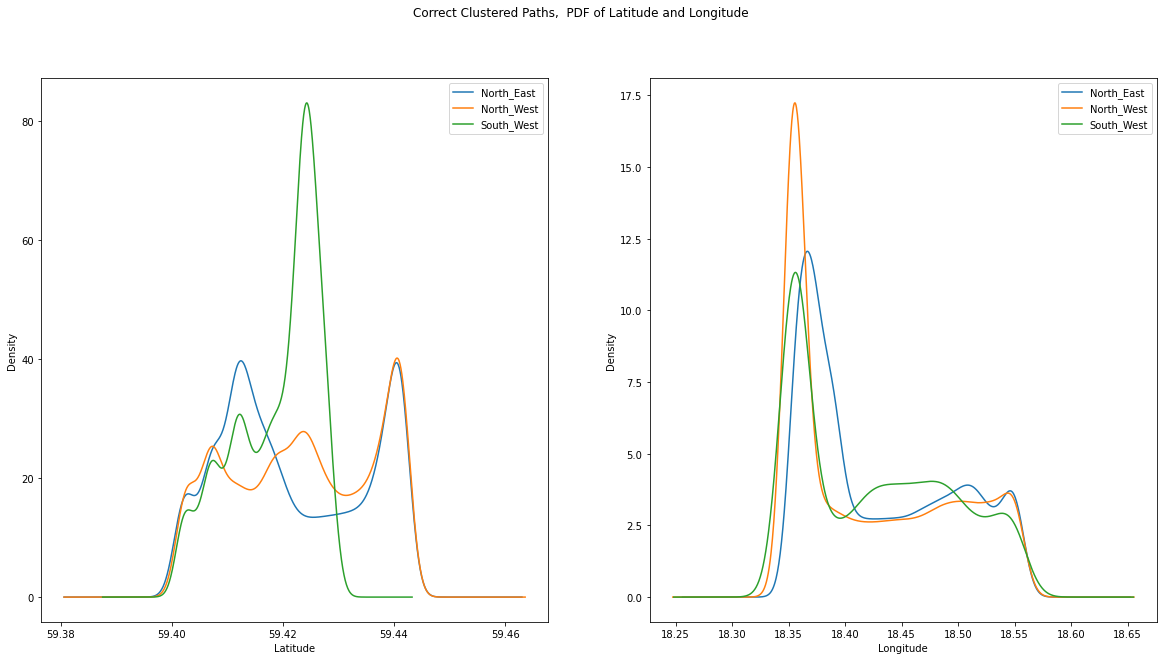

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# group the data by the 'direction' column and calculate the mean and standard deviation for the 'latitude' and 'longitude' columns
df_gmm_corrct_means = df_gmm_corct_clus.groupby('direction').agg({'latitude': 'mean', 'longitude': 'mean'})
df_gmm_corrct_std = df_gmm_corct_clus.groupby('direction').agg({'latitude': 'std', 'longitude': 'std'})

print(df_gmm_corrct_means)
print(df_gmm_corrct_std)

# create subplots for the means and standard deviations
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

# plot the means and standard deviations
# df_corrct_means.plot(kind='bar', ax=ax1, yerr=df_corrct_std, capsize=3)
ax1.set_ylabel('Mean Latitude/Longitude')

# plot the probability density function (PDF) for each latitude and longitude column
for col, ax in zip(['latitude', 'longitude'], [ax1, ax2]):
    for direction in df_gmm_corct_clus['direction'].unique():
        data = df_gmm_corct_clus.loc[df_gmm_corct_clus['direction'] == direction, col]
        data.plot(kind='density', ax=ax, label=direction)
    ax.legend()
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Density')
    
plt.suptitle('Correct Clustered Paths,  PDF of Latitude and Longitude')

fig.savefig(Output_folder+'/Plot_correct_clustering_gmm_pdfs.png', dpi=500)  
plt.show()

In [87]:
# st=stop

### Hierarchical clustering with distance matrix

[1 2 3 4 5]


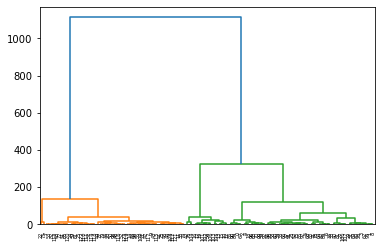

In [88]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Define the linkage method
# Z = linkage(distances, method='complete')
Z = linkage(distances, method='ward')


# Plot the dendrogram
dendrogram(Z)

## Divide the paths into three clusters
## Adjust this threshold based on the dendrogram plot

if rts_list_fg==0:
    max_dist =0.04 


if rts_list_fg==2: 
    max_dist = 100

    
clusters = fcluster(Z, t=max_dist, criterion='distance')

# print(clusters)
print(np.unique(clusters))

# Save the dendrogram plot to a file
# plt.savefig(Output_folder+'/Dendrogram_5paths.png', dpi=500)  
plt.show()

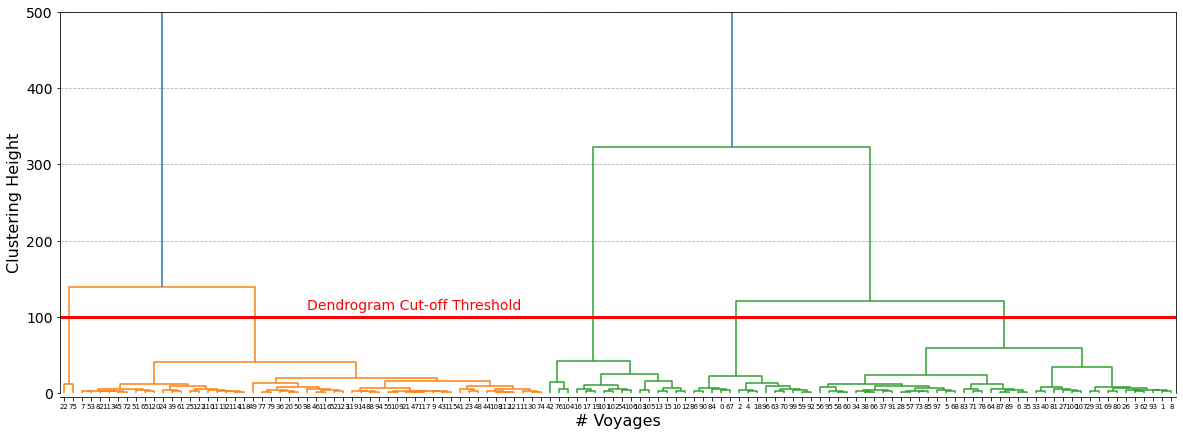

In [89]:
import matplotlib.pyplot as plt

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(20, 7))
dendrogram(Z, ax=ax)

# Set the y-axis limits
ax.set_ylim([0, 500])
ax.set_xlabel('# Voyages', fontsize=16)
ax.set_ylabel('Clustering Height', fontsize=16)
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=14)

# Plot a horizontal line at y=7 with color red
plt.axhline(y=max_dist, color='red', linewidth=3)  # Specify the linewidth
plt.text(275, max_dist + 10, 'Dendrogram Cut-off Threshold', color='red', fontsize=14)

ax.spines['bottom'].set_position(('outward', 4))  # Adjust this value to move the ticks closer

ax.grid(axis='y', linestyle='--', zorder=0)

# Save the dendrogram plot to a file
plt.savefig(Output_folder+'/Fig_Cind_5paths_Hierarch.png', dpi=300)
plt.show()


In [90]:
Z

array([[4.50000000e+01, 7.20000000e+01, 6.74282535e-01, 2.00000000e+00],
       [4.60000000e+01, 1.16000000e+02, 9.45599025e-01, 2.00000000e+00],
       [7.70000000e+01, 7.90000000e+01, 9.85625667e-01, 2.00000000e+00],
       [1.14000000e+02, 1.18000000e+02, 1.01425643e+00, 2.00000000e+00],
       [4.70000000e+01, 1.17000000e+02, 1.04360487e+00, 2.00000000e+00],
       [3.80000000e+01, 6.60000000e+01, 1.06187857e+00, 2.00000000e+00],
       [2.10000000e+01, 1.28000000e+02, 1.14965423e+00, 3.00000000e+00],
       [1.12000000e+02, 1.21000000e+02, 1.17370070e+00, 2.00000000e+00],
       [4.30000000e+01, 1.15000000e+02, 1.25112812e+00, 2.00000000e+00],
       [8.80000000e+01, 9.40000000e+01, 1.29575416e+00, 2.00000000e+00],
       [8.70000000e+01, 8.90000000e+01, 1.29671119e+00, 2.00000000e+00],
       [2.80000000e+01, 5.70000000e+01, 1.34038180e+00, 2.00000000e+00],
       [5.90000000e+01, 9.20000000e+01, 1.37462585e+00, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.41523539e

In [91]:
cluster_map2 = {
    1: 'South_West',
    2: 'South',
    3: 'North_West',
    4: 'North_East',
    5: 'North_Middle'}


path_class_labels = [cluster_map2[label] for label in clusters]

y_pred_HC=np.array(path_class_labels)
y_test_HC=df_class_disp.values
{class_name: count for class_name, count in zip(*np.unique(y_test_HC, return_counts=True))}
{class_name: count for class_name, count in zip(*np.unique(y_pred_HC, return_counts=True))}

{'North_East': 14,
 'North_Middle': 40,
 'North_West': 16,
 'South': 52,
 'South_West': 2}

In [92]:
from sklearn.metrics import confusion_matrix
conf_mat_HC = confusion_matrix(y_test_HC, y_pred_HC)


df_conf_mat_HC = pd.DataFrame(conf_mat_HC, index=['North_East', 'North_Middle',
                                            'North_West', 'South', 'South_West'], ##Actual paths
                           columns=['North_East', 'North_Middle',
                                            'North_West', 'South', 'South_West']) ##Predicted paths
df_conf_mat_HC


,North_East,North_Middle,North_West,South,South_West
North_East,14,0,0,0,0
North_Middle,0,40,0,0,0
North_West,0,0,16,0,0
South,0,0,0,52,0
South_West,0,0,0,0,2


In [93]:
report = classification_report(y_test_HC, y_pred_HC, output_dict=True)

df_report = pd.DataFrame.from_dict(report).transpose().round(3)
df_report

,precision,recall,f1-score,support
North_East,1.0,1.0,1.0,14.0
North_Middle,1.0,1.0,1.0,40.0
North_West,1.0,1.0,1.0,16.0
South,1.0,1.0,1.0,52.0
South_West,1.0,1.0,1.0,2.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,124.0
weighted avg,1.0,1.0,1.0,124.0


In [95]:
# st=stop


## Cinderella_cluster_by_TRACLUS

In [96]:
from sklearn.cluster import DBSCAN

# Create a dictionary to map cluster labels to path class labels

# Define the parameters for DBSCAN
eps = 0.5  # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 5 # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

# Initialize DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')

# Fit the model on the distance matrix
dbscan.fit(distances)

# Retrieve the labels assigned to each data point
traclus_labels = dbscan.labels_

# The label -1 indicates outliers, so we need to handle them separately
# Here, we'll assign them a special label 'Outlier'
cluster_label_map = {label: 'Outlier' if label == -1 else f'Cluster_{label}' for label in set(traclus_labels)}
# Apply the mapping to the cluster labels
traclus_class_labels = [cluster_label_map[label] for label in traclus_labels]

# # Apply the mapping to the cluster labels
# traclus_class_labels = [cluster_label_map[label] for label in traclus_labels]

# # traclus_class_labels


In [97]:
len(traclus_class_labels)


124

In [98]:
np.unique(traclus_labels)

array([-1,  0,  1,  2,  3], dtype=int64)

In [99]:
y_pred_traclus=np.array(traclus_class_labels)
y_test_traclus=df_class_disp.values
print({class_name: count for class_name, count in zip(*np.unique(y_test_traclus, return_counts=True))})
print({class_name: count for class_name, count in zip(*np.unique(y_pred_traclus, return_counts=True))})

{'North_East': 14, 'North_Middle': 40, 'North_West': 16, 'South': 52, 'South_West': 2}
{'Cluster_0': 10, 'Cluster_1': 18, 'Cluster_2': 52, 'Cluster_3': 9, 'Outlier': 35}


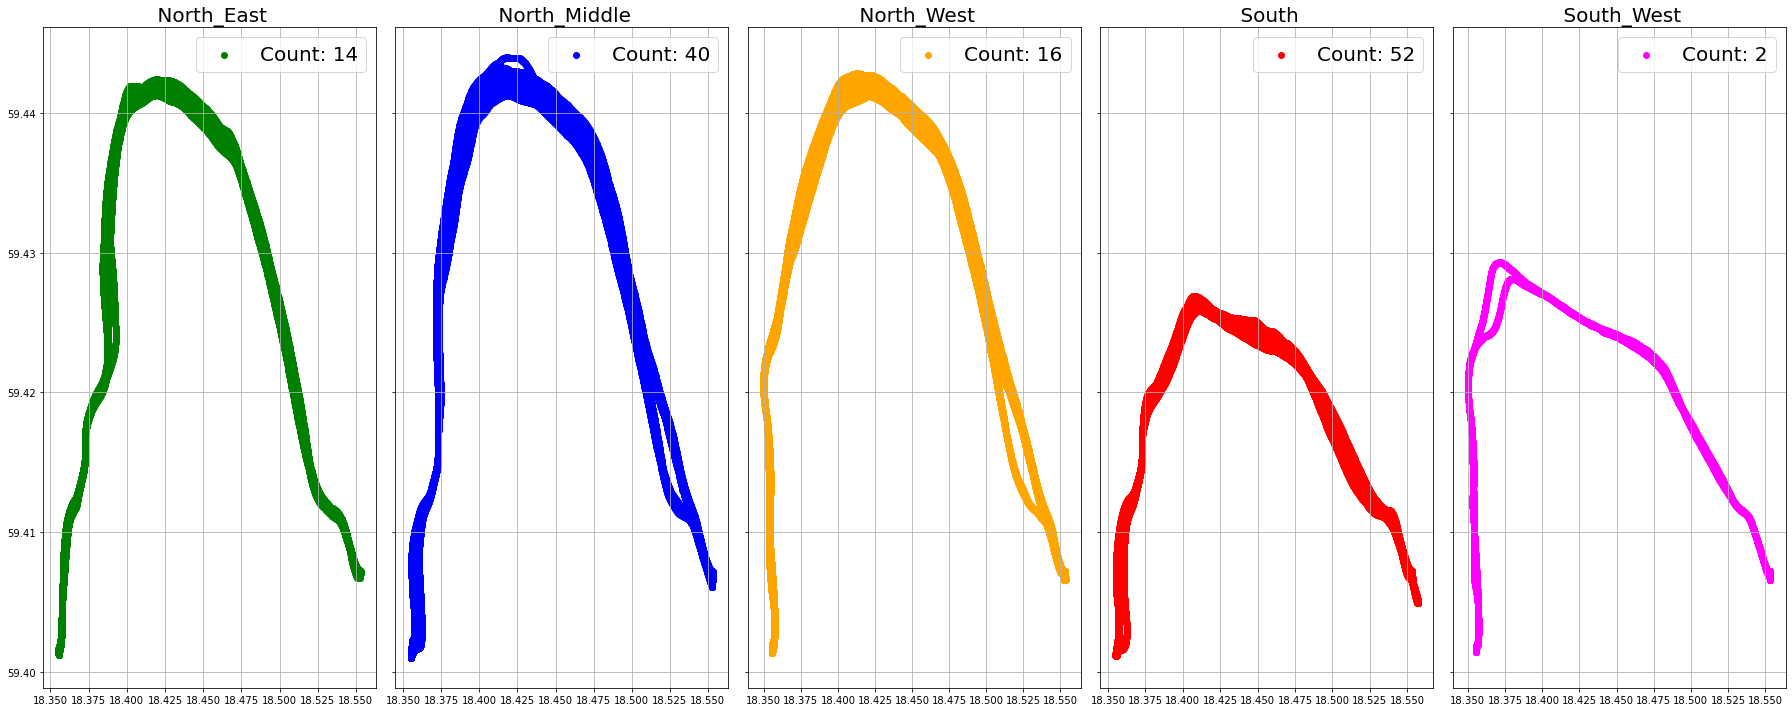

In [100]:
import matplotlib.pyplot as plt

# filter dataframe to include only rows with RT_id values in rts_list
path_plt = train_df[train_df.RT_id.isin(rts_list)]

# Define colors for different directions
colors = {'North_East': 'green', 'North_Middle': 'blue','North_West': 'orange',
          'South': 'red', 'South_West': 'magenta'}

# Get unique directions for clustering
unique_directions = path_plt['direction'].unique()

# Sort unique directions based on the order of colors
unique_directions = sorted(unique_directions, key=lambda x: list(colors.keys()).index(x))

# Calculate the count of paths for each cluster
cluster_counts = {class_name: count for class_name, count in zip(*np.unique(y_test_traclus, return_counts=True))}

# Create subplots for each cluster
fig, axs = plt.subplots(1, len(unique_directions), figsize=(25, 10), sharey=True)
# fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 15), sharey=True)

for i, direction in enumerate(unique_directions):
    group = path_plt[path_plt['direction'] == direction]
    axs[i].scatter(group['longitude'], group['latitude'], c=colors[direction], label=f'Count: {cluster_counts[direction]}')
    axs[i].set_title(f' {direction}', fontsize=20)
    axs[i].grid()
    axs[i].legend(fontsize=20)
plt.tight_layout()
plt.savefig(Output_folder+'/scatterplot_Obsrv_traclus_5paths_case_'+str(rts_list_fg)+'.png', dpi=500)  

plt.show()

In [101]:
# Create a new DataFrame dforig2_result with the same structure as dforig2
df_traclus_result = dforig2[['RT_id', 'latitude', 'longitude']].copy()

# Assign the cluster assignments to the 'direction' column of dforig2_result
for i, rt_id in enumerate(rts_list):
    idx = dforig2['RT_id'] == rt_id
    df_traclus_result.loc[idx, 'direction'] = y_pred_traclus[i]

# Convert the 'direction' column to integer type
df_traclus_result['direction'] = df_traclus_result['direction']

# df_dbscan_result

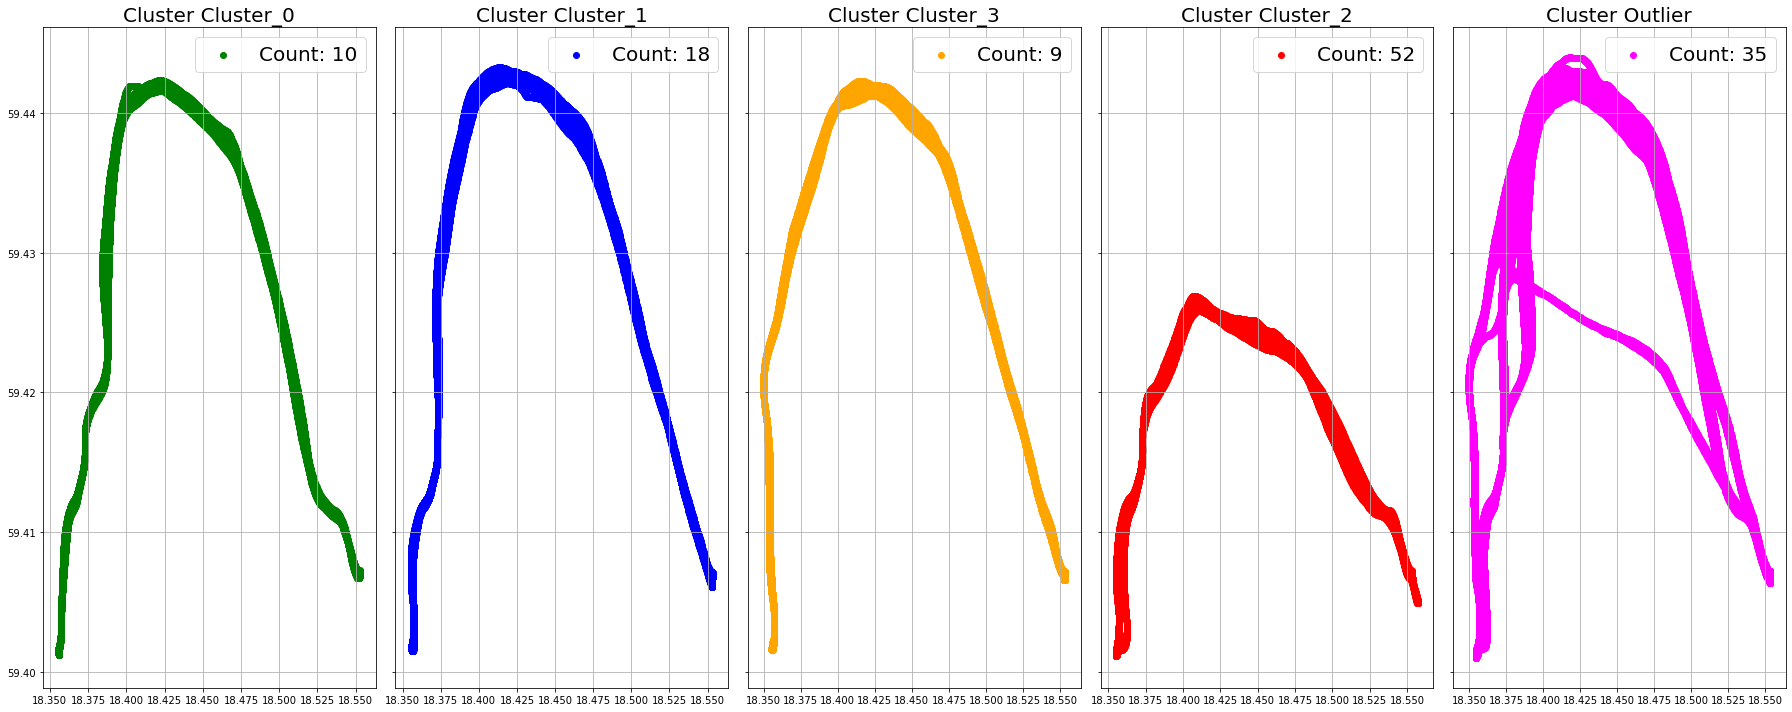

In [102]:
import matplotlib.pyplot as plt

# filter dataframe to include only rows with RT_id values in rts_list
traclus_path_plt = df_traclus_result[df_traclus_result.RT_id.isin(rts_list)]

# Define colors for different clusters
colors = {'Cluster_0': 'green', 'Cluster_1': 'blue','Cluster_3': 'orange',
          'Cluster_2': 'red', 'Outlier': 'magenta'}

# Get unique directions for clustering
traclus_unique_directions = traclus_path_plt['direction'].unique()

# Sort unique directions based on the order of colors
traclus_unique_directions = sorted(traclus_unique_directions, key=lambda x: list(colors.keys()).index(x))

# Calculate the count of paths for each cluster
cluster_counts = {class_name: count for class_name, count in zip(*np.unique(y_pred_traclus, return_counts=True))}

# Create subplots for each cluster
fig, axs = plt.subplots(1, len(traclus_unique_directions), figsize=(25, 10), sharey=True)

for i, direction in enumerate(traclus_unique_directions):
    group = traclus_path_plt[traclus_path_plt['direction'] == direction]
    axs[i].scatter(group['longitude'], group['latitude'], c=colors[direction], label=f'Count: {cluster_counts[direction]}')
    axs[i].set_title(f'Cluster {direction}', fontsize=20)
    axs[i].grid()
    axs[i].legend(fontsize=20)

plt.tight_layout()
plt.savefig(Output_folder+'/scatterplot_traclus_5paths_case_'+str(rts_list_fg)+'.png', dpi=500)  

plt.show()

In [103]:
# st=stop

In [104]:
if rts_list_fg==0:
    cluster_label_map = {
        0: 'North_East',
        1: 'North_Middle',
        2: 'South',
        3: 'North_West',
        -1: 'South_West'}

if rts_list_fg==2:
    cluster_label_map = {
        0: 'North_East',
        1: 'North_Middle',
        2: 'South',
        3: 'North_West',
        -1: 'South_West'}

cluster_label_map

traclus_labels

# Apply the mapping to the cluster labels
traclus_class_labels = [cluster_label_map[label] for label in traclus_labels]

# traclus_class_labels
y_pred_traclus=traclus_class_labels
len(traclus_class_labels)

124

In [105]:
unique_labels = set(y_pred_traclus)
print(unique_labels)

{'North_East', 'North_Middle', 'South_West', 'North_West', 'South'}


In [106]:
print(np.unique(y_test_traclus))
print(np.unique(traclus_class_labels))

['North_East' 'North_Middle' 'North_West' 'South' 'South_West']
['North_East' 'North_Middle' 'North_West' 'South' 'South_West']


In [107]:
import numpy as np

# Count the occurrences of each cluster label in y_pred_mapped
unique_labels, counts = np.unique(y_pred_traclus, return_counts=True)

# Display the counts for each cluster label
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} occurrences")

Cluster North_East: 10 occurrences
Cluster North_Middle: 18 occurrences
Cluster North_West: 9 occurrences
Cluster South: 52 occurrences
Cluster South_West: 35 occurrences


In [108]:
import numpy as np

# Count the occurrences of each cluster label in y_pred_mapped
unique_labels_test, counts = np.unique(y_test_traclus, return_counts=True)

# Display the counts for each cluster label
for label, count in zip(unique_labels_test, counts):
    print(f"Cluster {label}: {count} occurrences")

Cluster North_East: 14 occurrences
Cluster North_Middle: 40 occurrences
Cluster North_West: 16 occurrences
Cluster South: 52 occurrences
Cluster South_West: 2 occurrences


In [110]:
# Create a new DataFrame dforig2_result with the same structure as dforig2
df_traclus_result = dforig2[['RT_id', 'latitude', 'longitude']].copy()

# Assign the cluster assignments to the 'direction' column of dforig2_result
for i, rt_id in enumerate(rts_list):
    idx = dforig2['RT_id'] == rt_id
    df_traclus_result.loc[idx, 'direction'] = y_pred_traclus[i]

# Convert the 'direction' column to integer type
df_traclus_result['direction'] = df_traclus_result['direction']

# df_traclus_result

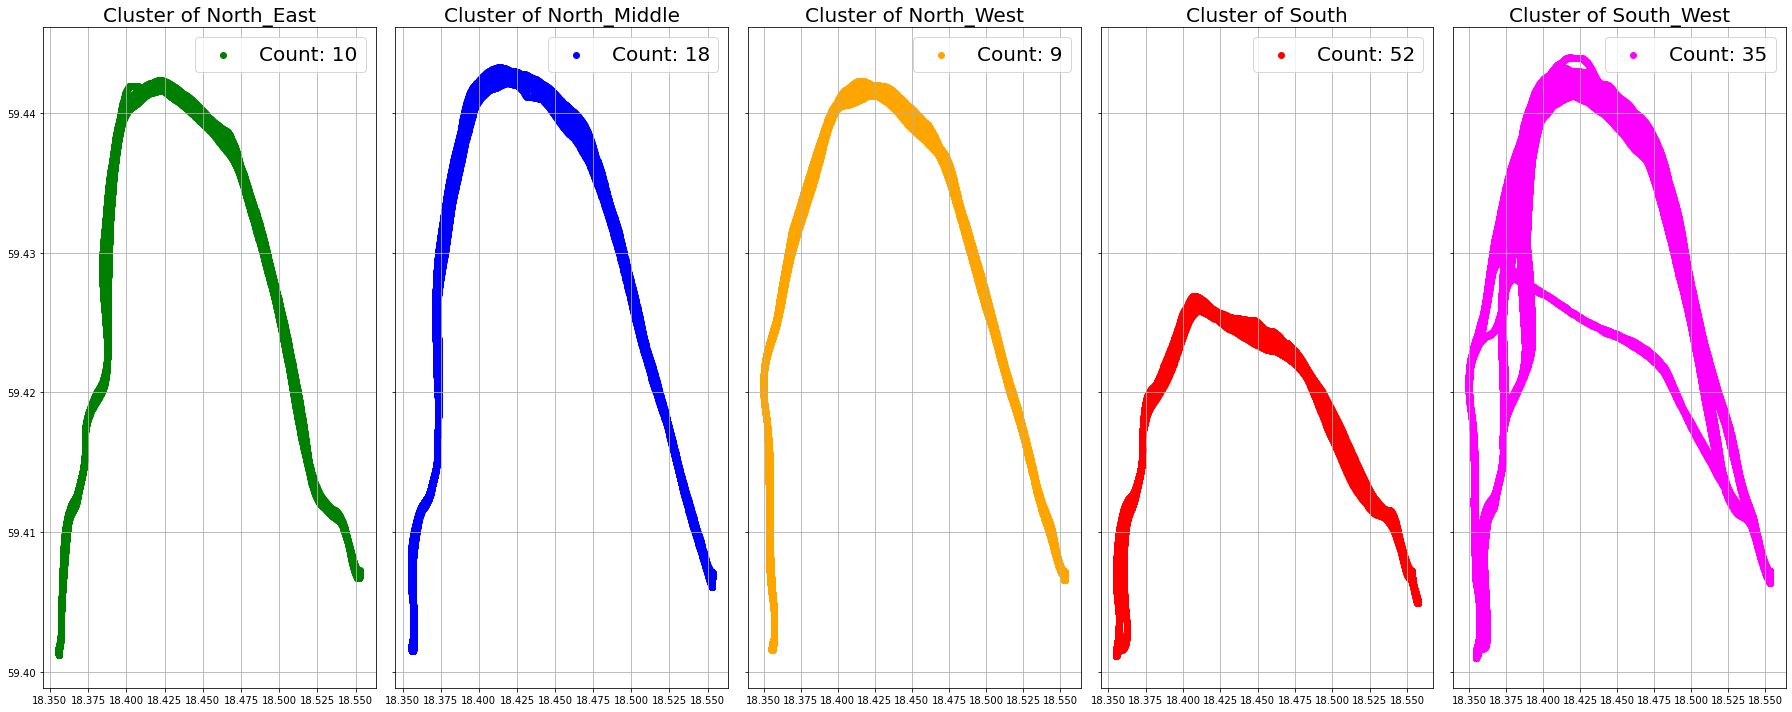

In [111]:
import matplotlib.pyplot as plt

# filter dataframe to include only rows with RT_id values in rts_list
traclus_path_plt = df_traclus_result[df_traclus_result.RT_id.isin(rts_list)]

# Define colors for different directions
colors = {'North_East': 'green', 'North_Middle': 'blue','North_West': 'orange',
          'South': 'red', 'South_West': 'magenta'}

# Get unique directions for clustering
traclus_unique_directions = traclus_path_plt['direction'].unique()

# Sort unique directions based on the order of colors
traclus_unique_directions = sorted(traclus_unique_directions, key=lambda x: list(colors.keys()).index(x))

# Calculate the count of paths for each cluster
cluster_counts = {class_name: count for class_name, count in zip(*np.unique(y_pred_traclus, return_counts=True))}

# Create subplots for each cluster
fig, axs = plt.subplots(1, len(traclus_unique_directions), figsize=(25, 10), sharey=True)

for i, direction in enumerate(traclus_unique_directions):
    group = traclus_path_plt[traclus_path_plt['direction'] == direction]
    axs[i].scatter(group['longitude'], group['latitude'], c=colors[direction], label=f'Count: {cluster_counts[direction]}')
    axs[i].set_title(f'Cluster of {direction}', fontsize=20)
    axs[i].grid()
    axs[i].legend(fontsize=20)

plt.tight_layout()
plt.savefig(Output_folder+'/scatterplot_Lab_traclus_5paths_case_'+str(rts_list_fg)+'.png', dpi=500)  

plt.show()

In [112]:
from sklearn.metrics import confusion_matrix
conf_mat_traclus= confusion_matrix(y_test_traclus, y_pred_traclus)
# print(f'Confusion matrix:\n{conf_mat_traclus}')


df_conf_mat_traclus = pd.DataFrame(conf_mat_traclus, index=['North_East', 'North_Middle', 'North_West',
                                            'South', 'South_West'], ##Actual paths
                           columns=['North_East', 'North_Middle', 'North_West',
                                            'South', 'South_West']) ##Predicted paths
df_conf_mat_traclus

,North_East,North_Middle,North_West,South,South_West
North_East,10,0,0,0,4
North_Middle,0,18,0,0,22
North_West,0,0,9,0,7
South,0,0,0,52,0
South_West,0,0,0,0,2


In [113]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

print(classification_report(y_test_traclus, y_pred_traclus))


              precision    recall  f1-score   support

  North_East       1.00      0.71      0.83        14
North_Middle       1.00      0.45      0.62        40
  North_West       1.00      0.56      0.72        16
       South       1.00      1.00      1.00        52
  South_West       0.06      1.00      0.11         2

    accuracy                           0.73       124
   macro avg       0.81      0.75      0.66       124
weighted avg       0.98      0.73      0.81       124



In [114]:
report = classification_report(y_test_traclus, y_pred_traclus, output_dict=True)

df_report = pd.DataFrame.from_dict(report).transpose().round(3)
df_report

,precision,recall,f1-score,support
North_East,1.000,0.714,0.833,14.000
North_Middle,1.000,0.450,0.621,40.000
North_West,1.000,0.562,0.720,16.000
South,1.000,1.000,1.000,52.000
South_West,0.057,1.000,0.108,2.000
accuracy,0.734,0.734,0.734,0.734
macro avg,0.811,0.745,0.656,124.000
weighted avg,0.985,0.734,0.808,124.000


In [115]:
np.unique(labels)

array(['North_East', 'North_Middle', 'North_West', 'South', 'South_West'],
      dtype='<U12')

In [116]:
y_pred_traclus
y_test_traclus
# Find the indices of mismatched entries
mismatch_traclus_indices = np.where(y_pred_traclus != y_test_traclus)[0]

# Print the indices of mismatched entries
print(mismatch_traclus_indices.shape)
print("Indices of mismatched entries:")
print(mismatch_traclus_indices)

(33,)
Indices of mismatched entries:
[  1   2   3   6   8  18  27  29  31  33  35  40  42  56  62  64  67  76
  78  80  81  83  91  93  95  96 100 102 103 104 105 106 107]


In [117]:
misclus_traclus_rts=df_class_disp.iloc[mismatch_traclus_indices.tolist()]
misclus_traclus_rts

RT_id
1.0      North_Middle
2.0        North_East
3.0      North_Middle
6.0      North_Middle
8.0      North_Middle
18.0       North_East
27.0     North_Middle
29.0     North_Middle
31.0     North_Middle
33.0     North_Middle
35.0     North_Middle
40.0     North_Middle
42.0       North_West
56.0     North_Middle
62.0     North_Middle
64.0     North_Middle
67.0       North_East
76.0       North_West
78.0     North_Middle
80.0     North_Middle
81.0     North_Middle
83.0     North_Middle
91.0     North_Middle
93.0     North_Middle
95.0     North_Middle
96.0       North_East
100.0    North_Middle
102.0      North_West
103.0      North_West
104.0      North_West
105.0      North_West
106.0      North_West
107.0    North_Middle
Name: direction, dtype: object

In [118]:
misclus_traclus_rts.index

Index([  1.0,   2.0,   3.0,   6.0,   8.0,  18.0,  27.0,  29.0,  31.0,  33.0,
        35.0,  40.0,  42.0,  56.0,  62.0,  64.0,  67.0,  76.0,  78.0,  80.0,
        81.0,  83.0,  91.0,  93.0,  95.0,  96.0, 100.0, 102.0, 103.0, 104.0,
       105.0, 106.0, 107.0],
      dtype='float64', name='RT_id')